## Welcome!

In this second book, I focus on more data preparation backed by Explanatory Data Analysis.

In [1567]:
# data munging
import numpy as np
import pandas as pd

# viz
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

And pandas setup...

In [1568]:
# pandas setup
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.precision', 2)

In [1616]:
# read in data
playersDataEPL = pd.read_csv("../../csv_files/EPL-Wage-Estimator/playersDataEPL.csv", index_col=0)
playersDataEPL.head(3)

name_short               team nationality  age  ova  pot   foot  bp  \
0   B. Williams  Manchester United     England   18   71   86  Right  LB   
1  M. Greenwood  Manchester United     England   17   73   89   Left  ST   
2       B. Saka            Arsenal     England   17   74   89   Left  LM   

   value  crossing  finishing  heading accuracy  short passing  volleys  \
0  €4.5M        63         54                59             69       53   
1    €8M        64         74                64             69       61   
2   €11M        79         62                45             68       55   

   dribbling  curve  fk accuracy  long passing  ball control  acceleration  \
0         72     57           30            59            70            79   
1         72     67           65            65            70            78   
2         77     72           48            63            73            86   

   sprint speed  agility  reactions  balance  shot power  jumping  stamina  \
0            84       76         68       64          68       72       74   
1            81       78         70       64          76       63       69   
2            82       82         67       80          64       56       76   

   strength  long shots  aggression  interceptions  positioning  vision  \
0        62          50          80             71           65      60   
1        65          72          55             34           73      69   
2        58          60          64             53           68      65   

   penalties  composure  marking  standing tackle  sliding tackle  gk diving  \
0         41       70.0       68               67              67         10   
1         64       73.0       35               39              33          5   
2         58       70.0       55               58              62          7   

   gk handling  gk positioning  gk reflexes  height_cm  weight_kg  \
0           13               7            7     182.88      69.85   
1            6               9            8     185.42      69.85   
2            8               9           13     177.80      64.86   

                       league  last_name      wage  
0  English Premier League (1)   Williams  14350.46  
1  English Premier League (1)  Greenwood  15375.50  
2  English Premier League (1)       Saka   8200.26

In [1570]:
playersDataEPL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 764 entries, 0 to 763
Data columns (total 47 columns):
name_short          764 non-null object
team                764 non-null object
nationality         764 non-null object
age                 764 non-null int64
ova                 764 non-null int64
pot                 764 non-null int64
foot                764 non-null object
bp                  764 non-null object
value               764 non-null object
crossing            764 non-null int64
finishing           764 non-null int64
heading accuracy    764 non-null int64
short passing       764 non-null int64
volleys             764 non-null int64
dribbling           764 non-null int64
curve               764 non-null int64
fk accuracy         764 non-null int64
long passing        764 non-null int64
ball control        764 non-null int64
acceleration        764 non-null int64
sprint speed        764 non-null int64
agility             764 non-null int64
reactions           764 non-nul

In [1571]:
# Convert the attribute data types from float to integer
playersDataEPL['composure'] = playersDataEPL['composure'].astype('int64')

In [1572]:
playersDataEPL.isna().sum()

name_short          0
team                0
nationality         0
age                 0
ova                 0
pot                 0
foot                0
bp                  0
value               0
crossing            0
finishing           0
heading accuracy    0
short passing       0
volleys             0
dribbling           0
curve               0
fk accuracy         0
long passing        0
ball control        0
acceleration        0
sprint speed        0
agility             0
reactions           0
balance             0
shot power          0
jumping             0
stamina             0
strength            0
long shots          0
aggression          0
interceptions       0
positioning         0
vision              0
penalties           0
composure           0
marking             0
standing tackle     0
sliding tackle      0
gk diving           0
gk handling         0
gk positioning      0
gk reflexes         0
height_cm           0
weight_kg           0
league              0
last_name 

Let's take a look at the descriptive statistics.

In [1573]:
playersDataEPL.describe()

age     ova     pot  crossing  finishing  heading accuracy  \
count  764.00  764.00  764.00    764.00     764.00            764.00   
mean    24.29   70.81   77.38     54.73      49.10             55.16   
std      5.39    9.41    6.23     19.90      20.61             19.06   
min     16.00   48.00   61.00      9.00       5.00             10.00   
25%     19.75   62.00   73.00     42.75      33.00             45.00   
50%     24.00   74.00   77.00     58.00      52.00             58.00   
75%     28.00   78.00   82.00     70.00      66.00             70.00   
max     43.00   91.00   92.00     94.00      94.00             91.00   

       short passing  volleys  dribbling   curve  fk accuracy  long passing  \
count         764.00   764.00     764.00  764.00       764.00        764.00   
mean           63.56    47.42      60.53   52.99        46.56         57.89   
std            16.08    19.29      20.43   20.16        19.14         16.19   
min            13.00     5.00       6.00    9.00         8.00         11.00   
25%            55.00    33.00      53.75   39.00        32.75         47.00   
50%            68.00    49.00      65.00   56.00        46.00         61.00   
75%            76.00    63.00      75.00   69.25        62.25         70.00   
max            92.00    86.00      92.00   91.00        89.00         91.00   

       ball control  acceleration  sprint speed  agility  reactions  balance  \
count        764.00        764.00        764.00   764.00     764.00   764.00   
mean          63.51         65.66         65.70    65.07      67.33    65.55   
std           17.75         14.47         14.49    13.84      11.52    13.79   
min           10.00         17.00         16.00    23.00      29.00    21.00   
25%           56.00         57.00         57.00    56.00      58.00    57.00   
50%           68.00         67.00         68.00    67.00      70.00    67.00   
75%           77.00         76.00         76.00    75.00      76.00    75.00   
max           92.00         97.00         96.00    95.00      93.00    96.00   

       shot power  jumping  stamina  strength  long shots  aggression  \
count      764.00   764.00   764.00    764.00      764.00      764.00   
mean        62.55    65.46    63.41     65.44       50.82       60.76   
std         15.44    11.79    15.79     12.49       20.68       18.27   
min         16.00    29.00    16.00     29.00        4.00       12.00   
25%         52.00    58.00    55.00     57.00       35.00       48.00   
50%         64.00    66.00    65.00     66.00       54.50       64.00   
75%         76.00    73.00    75.00     75.00       68.00       76.00   
max         91.00    93.00    97.00     94.00       90.00       93.00   

       interceptions  positioning  vision  penalties  composure  marking  \
count         764.00       764.00  764.00     764.00     764.00   764.00   
mean           50.97        54.38   59.46      51.79      64.90    50.93   
std            22.46        20.95   15.29      16.76      13.32    22.09   
min             6.00         4.00   11.00      11.00      24.00     7.00   
25%            29.00        44.75   49.00      42.00      55.00    32.00   
50%            53.00        57.50   60.00      52.00      67.00    54.00   
75%            73.00        71.00   72.00      63.00      75.00    71.25   
max            92.00        94.00   94.00      91.00      92.00    93.00   

       standing tackle  sliding tackle  gk diving  gk handling  \
count           764.00          764.00     764.00       764.00   
mean             52.50           49.70      17.21        17.01   
std              23.02           23.15      19.25        18.61   
min              10.00            8.00       3.00         3.00   
25%              31.00           27.00       9.00         8.00   
50%              57.00           53.00      11.00        11.00   
75%              74.00           71.00      14.00        14.00   
max              93.00           90.00      90.00        

Here are some comments based on the descriptive stats:
 - Attributes: Some of the means are alot less than others such as `volleys` and `fk accuracy`. That is very normal because such attributes require a lot of skill and talent to be high.  The standard deviation travels between 11 and 24. That is because those attributes are limited to the role of the player, such as `interception` is an essential for defenders and `finishing` for attackers. All the attributes are between 0 and 100 as they are supposed to be. Also, I observe that Goalkeeper attributes are at the lower end. That is because there are less Goakeepers in the league than any other role and their GK attributes are unique to them.
 - Age: It is stretching between 16 and 43. I agree with that. There are very young talents as well as experinced icons in the game of soccer.
 - Weight and Height: I am suprised with the average height. I believe EPL has the pyhsical advantage over other leagues (except German Bundesliga).
 - Wage: The average wage is 45K Euros with standard deviation of 52K Euros. That actually confirms existence of the high (over!) payed soccer players. There is some outliers there. I may be addressing them later.

Next is checking the paiplot of the basic features and the target (`wage`). I use `ova` (overall attribute average) instead of the 33 attribute columns to avoid the madness. It represents them pretty much ok.

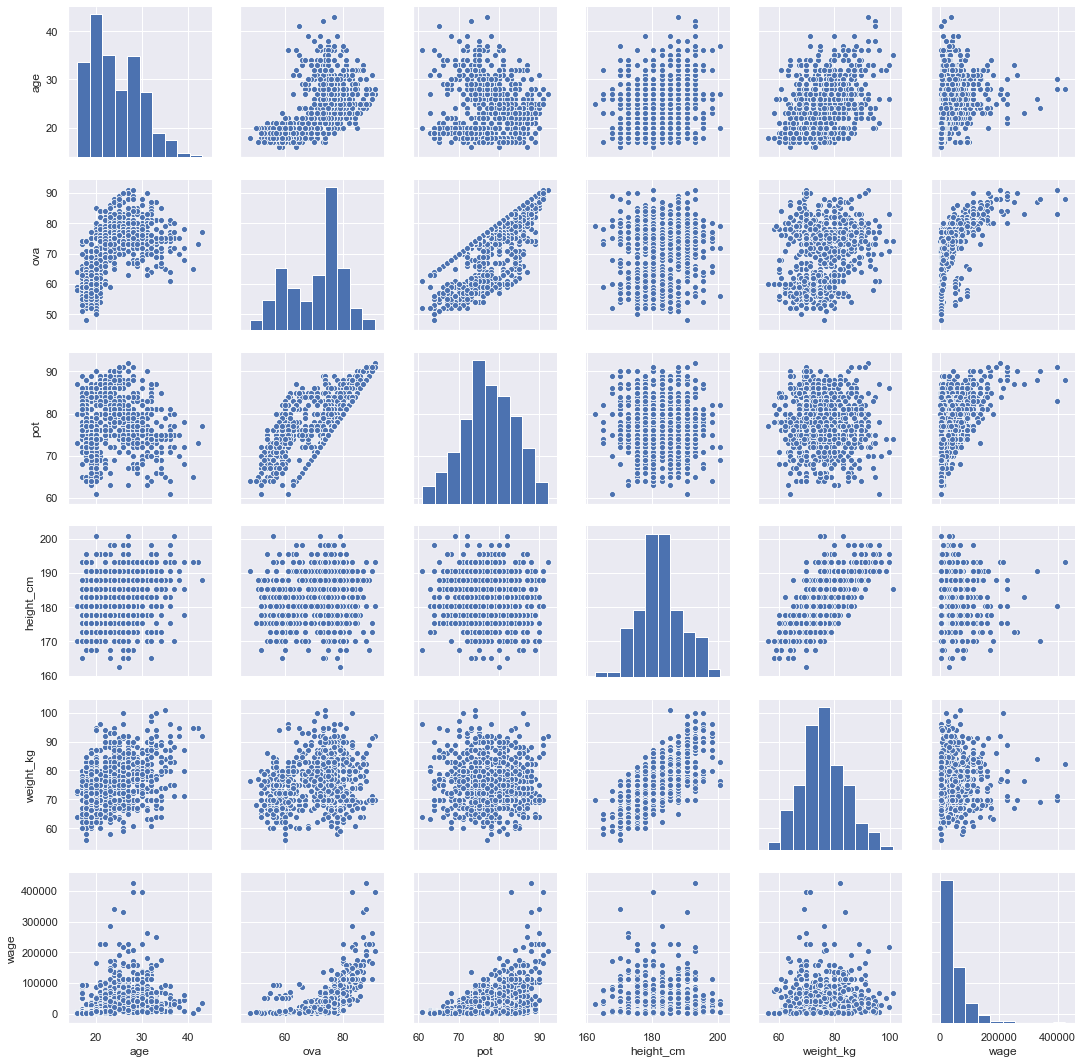

In [1388]:
sns.pairplot(playersDataEPL[['age', 'ova', 'pot', 'height_cm', 'weight_kg', 'wage']]);

What these tell me:
 - `height` and `weight` does not seem to tell me a lot about the wage distribution by themselves. I can interact them to get some sort of a bio-score in the feature intercation section.
 - `age` seems like a good factor given its distribution with wage. It does not have any collinearity case.
 - `ova` is the overall representation of the attributes. I do not expect it to perform great by itself. I feel like there is a good potential for some cool feature engineering.
 - `pot` is the future potential max attribute of a player. It seems like helping with its (somewhat) linear relationto target.
 
There is much to do.

### 1) Baseline Model

Let's start with one feature!

In [1617]:
#Separate our features from our target

X = playersDataEPL.loc[:,['ova']]

y = playersDataEPL['wage']

# train test split
X_train, X_val, y_train, y_val = \
train_test_split(X, y, test_size=0.2, random_state=10)

# train and fit
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# R^2
train_score = lr_model.score(X_train, y_train)
val_score = lr_model.score(X_val, y_val)

print(train_score, val_score)

0.4440841260656747 0.44720549508499835


This is pretty low. I wonder why. Let's take a look at residual distribution with predictions.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


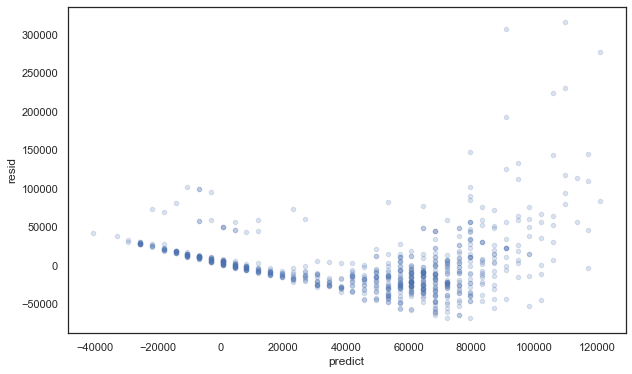

In [1618]:
lr = LinearRegression()
fit = lr.fit(X,y)

playersDataEPL['predict']=fit.predict(X)
playersDataEPL['resid']=playersDataEPL.wage-playersDataEPL.predict
with sns.axes_style('white'):
    plot=playersDataEPL.plot(kind='scatter',
                  x='predict',y='resid',alpha=0.2,figsize=(10,6))

There are negative predictions! We need to take a closer look at this issue.

In [1619]:
playersDataEPL[playersDataEPL['predict'] <= 0].describe()

age     ova     pot  crossing  finishing  heading accuracy  \
count  112.00  112.00  112.00    112.00     112.00            112.00   
mean    18.66   55.47   70.39     42.11      37.03             43.83   
std      1.08    2.18    4.25     11.93      14.05             12.46   
min     16.00   48.00   61.00     11.00       5.00             10.00   
25%     18.00   54.00   67.00     38.00      25.75             40.00   
50%     19.00   56.00   70.00     45.00      38.50             46.50   
75%     19.00   57.00   73.00     51.00      49.00             52.00   
max     21.00   58.00   80.00     58.00      62.00             69.00   

       short passing  volleys  dribbling   curve  fk accuracy  long passing  \
count         112.00   112.00     112.00  112.00       112.00        112.00   
mean           48.86    36.04      47.63   39.87        36.40         44.21   
std            11.43    12.17      14.35   12.39        11.52         12.07   
min            16.00     5.00       6.00    9.00         9.00         17.00   
25%            44.00    30.00      44.00   33.00        30.00         34.75   
50%            50.50    38.00      53.00   41.00        37.00         46.50   
75%            57.00    46.00      57.00   49.00        44.00         54.00   
max            66.00    57.00      65.00   66.00        65.00         64.00   

       ball control  acceleration  sprint speed  agility  reactions  balance  \
count        112.00        112.00        112.00   112.00     112.00   112.00   
mean          48.78         63.50         62.85    59.51      50.03    64.06   
std           12.10         13.24         13.10    13.17       5.22    11.44   
min           10.00         20.00         18.00    27.00      29.00    29.00   
25%           45.75         59.75         58.75    53.00      47.00    57.00   
50%           53.00         66.00         66.00    62.00      51.00    66.00   
75%           57.00         72.00         71.25    68.00      54.00    73.00   
max           63.00         86.00         85.00    87.00      61.00    83.00   

       shot power  jumping  stamina  strength  long shots  aggression  \
count      112.00   112.00   112.00    112.00      112.00      112.00   
mean        47.19    57.63    53.39     54.82       36.27       46.54   
std         10.79     8.99    10.95      9.64       13.20       12.96   
min         17.00    32.00    23.00     34.00        4.00       16.00   
25%         41.00    53.00    49.00     48.00       26.00       35.75   
50%         49.50    58.00    55.00     55.50       38.50       50.50   
75%         55.00    63.25    61.00     62.00       45.00       56.00   
max         65.00    79.00    71.00     76.00       61.00       73.00   

       interceptions  positioning  vision  penalties  composure  marking  \
count         112.00       112.00  112.00     112.00     112.00   112.00   
mean           37.88        41.35   44.44      42.12      47.49    39.54   
std            15.38        14.28   11.39      11.88       8.97    14.97   
min             6.00         4.00   11.00      13.00      24.00     9.00   
25%            23.00        35.50   36.75      35.00      42.00    23.75   
50%            43.00        47.00   47.50      43.50      49.00    45.50   
75%            51.00        50.25   53.25      49.00      53.00    52.00   
max            58.00        62.00   66.00      75.00      67.36    60.00   

       standing tackle  sliding tackle  gk diving  gk handling  \
count           112.00          112.00     112.00       112.00   
mean             42.37           40.98      14.82        14.08   
std              15.71           15.76      13.59        13.00   
min              10.00           10.00       5.00         5.00   
25%              27.75           26.50       9.00         8.00   
50%              49.00           48.00      11.00        11.00   
75%              55.00           54.00      13.25        13.00   
max              63.00           61.00      63.00        

Hmm. The straight line forms because we have predictions below zero. It seems like the younger players with low `ova` causing We have to keep an eye on that. Once we have our final model and if the problem persists, we can regularize it by ridge or we can remove those observations causing the problem. 

Also, there is a sign of heteroscdasticity. Well, it is too early to make any major model changes. We can run this analysis once we are at the final stage.

Since we will be repeatedly splitting X, y into the same train/val partitions and fitting/scoring new models as we update the feature set, I will define a reusable function that completes all these steps, making the code/process more efficient going forward. 

In [1620]:
def split_and_validate(X, y):
    """
    For a set of features and target X, y, perform a 80/20 train/val split,
    fit and validate a linear regression model, and report results.
    """
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
    train_test_split(X, y, test_size=0.2, random_state=10)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    train_score = lr_model.score(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # track negative predictions
    playersDataEPL['predict']=lr_model.fit(X,y).predict(X)
    
    # report results
    print(f"There are {playersDataEPL[playersDataEPL['predict'] <= 0].shape[0]} negative predictions.")
    print("\nTrain R^2 score is:", train_score)
    print("Validation R^2 score is:", val_score)
    print("\nFeature coefficient results: \n")
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ":", f"{coef:.2f}")

In [1621]:
# run the model
split_and_validate(X, y)

There are 112 negative predictions.

Train R^2 score is: 0.4440841260656747
Validation R^2 score is: 0.44720549508499835

Feature coefficient results: 

ova : 3758.75


Let's add `age`. It has the normally distributed (with a mean of 28ish) relationship with the target.

In [1622]:
X = playersDataEPL.loc[:,['ova', 'age']]
y = playersDataEPL['wage']

# run the model
split_and_validate(X, y)

There are 114 negative predictions.

Train R^2 score is: 0.4478292226752705
Validation R^2 score is: 0.46163907992928044

Feature coefficient results: 

ova : 4063.38
age : -918.49


Almost 1.5% boost. Now, we add `pot`. That may provide some coverage for the youngsters with ok potential.

In [1623]:
X = playersDataEPL.loc[:,['ova', 'age', 'pot']]
y = playersDataEPL['wage']

# run the model
split_and_validate(X, y)

There are 116 negative predictions.

Train R^2 score is: 0.4519682074650059
Validation R^2 score is: 0.4633999813335637

Feature coefficient results: 

ova : 3192.38
age : 59.35
pot : 1195.32


Tiny improvement. Let's add the attribute features.

In [1624]:
cols = ['ova', 'age', 'pot'] + list(playersDataEPL.columns[9:42])
X = playersDataEPL.loc[:, cols]
y = playersDataEPL['wage']

# run the model
split_and_validate(X, y)

There are 110 negative predictions.

Train R^2 score is: 0.5075183200292447
Validation R^2 score is: 0.43019402456415334

Feature coefficient results: 

ova : 3103.37
age : -338.14
pot : 929.13
crossing : 214.95
finishing : -459.65
heading accuracy : -433.14
short passing : 39.20
volleys : 696.14
dribbling : -363.03
curve : -281.78
fk accuracy : 475.81
long passing : 103.00
ball control : -166.81
acceleration : 147.66
sprint speed : -41.57
agility : -91.54
reactions : 1004.90
balance : 31.05
shot power : 132.81
jumping : 216.93
stamina : -331.24
strength : 171.39
long shots : -849.47
aggression : -91.15
interceptions : -251.58
positioning : 216.07
vision : 410.80
penalties : 228.49
composure : -154.64
marking : 122.32
standing tackle : -599.18
sliding tackle : 398.11
gk diving : 221.80
gk handling : -283.10
gk positioning : -790.43
gk reflexes : -64.31


Can you see the signs of overfitting? We need more sophisticated methods as of this point. Time for feature engineering!

### 2) Adding Interaction Terms

Let's interact `height` and `weight` since they show a linear relationship with eachother. We can calculate body-mass-index and have a good presentation of physical score! The formual is as follows: 
    bms = kg / (meter)^2

Also, lets take out the attributes since they caused overfitting and lower the validation score. We can formulate something for them later.

In [1625]:
playersDataEPL['bms'] = playersDataEPL['weight_kg'] / ((playersDataEPL['height_cm']/100) ** 2)

In [1626]:
#Separate our features from our target
cols = ['ova', 'age', 'pot', 'bms']

X = playersDataEPL.loc[:,cols]
y = playersDataEPL['wage']

# run the model
split_and_validate(X, y)

There are 115 negative predictions.

Train R^2 score is: 0.4532187845273782
Validation R^2 score is: 0.46137376184881884

Feature coefficient results: 

ova : 3229.94
age : 131.42
pot : 1162.08
bms : -1009.57


In [1627]:
playersDataEPL['bms'].describe()

count    764.00
mean      22.82
std        1.62
min       18.36
25%       21.76
50%       22.78
75%       23.87
max       29.42
Name: bms, dtype: float64

In [1628]:
%%html
<img src="../../images/EPL-Wage-Estimator/BMI-in-Adults-722x406.jpg", width=400, height=200>

`bms` does not have much of an impact on the score. But the way it links makes sense given the sign of the coefficient and the picture of bms legend. The large values of `bms` is not good for the performance, hence lower wage.  Let's keep `bms` for now.

Let's get fancy and add transformed attributes next. The way we transform them is taking the average of the grouped attributes. We group the attributes based on the play styles. To achieve that, we need some solid analysis going between data and domain knowledge.

Let's check the average attribute amounts per position.

In [1629]:
df_positions = playersDataEPL.groupby('bp').mean().iloc[:, 3:36]
df_positions

crossing  finishing  heading accuracy  short passing  volleys  dribbling  \
bp                                                                              
CAM     62.58      61.14             49.96          71.11    57.93      71.53   
CB      48.70      35.67             70.68          64.03    37.43      53.11   
CDM     59.84      50.02             63.76          74.38    50.28      67.68   
CF      67.00      80.33             73.67          78.67    78.33      84.00   
CM      68.89      61.68             57.32          78.06    61.67      72.38   
GK      14.77      12.31             14.81          31.66    13.06      14.42   
LB      65.53      42.58             58.08          62.53    42.21      65.45   
LM      69.04      61.46             49.39          67.25    57.18      73.75   
LW      68.27      69.18             53.55          68.91    63.27      76.55   
LWB     72.88      44.62             55.25          67.25    37.38      69.62   
RB      66.51      43.30             58.28          63.42    43.84      66.30   
RM      61.67      58.39             48.14          64.25    54.63      70.24   
RW      67.88      68.50             45.50          68.62    59.62      77.00   
RWB     74.08      48.83             58.75          71.58    44.42      73.00   
ST      52.86      71.37             68.45          62.59    64.39      67.62   

     curve  fk accuracy  long passing  ball control  acceleration  \
bp                                                                  
CAM  65.08        59.46         66.10         71.79         71.62   
CB   42.81        37.94         59.24         60.87         56.94   
CDM  57.56        53.20         71.28         71.48         62.26   
CF   76.33        59.33         63.00         83.33         80.00   
CM   69.92        65.38         75.89         76.03         64.83   
GK   15.28        14.60         32.24         24.45         43.02   
LB   57.26        49.32         54.63         64.39         71.76   
LM   67.43        58.36         61.39         71.32         80.11   
LW   69.55        63.09         59.18         74.45         81.73   
LWB  63.00        44.88         58.75         69.12         74.50   
RB   56.14        44.05         55.63         64.79         73.21   
RM   60.33        53.08         58.55         68.22         78.78   
RW   67.62        56.94         59.62         75.00         82.06   
RWB  61.33        49.75         64.00         73.75         78.67   
ST   57.04        46.88         49.32         68.81         70.77   

     sprint speed  agility  reactions  balance  shot power  jumping  stamina  \
bp                                                                             
CAM         69.64    74.90      66.29    74.33       67.57    58.97    64.50   
CB          59.80    54.49      67.86    56.10       55.57    72.31    63.69   
CDM         63.40    62.88      70.42    67.02       69.04    67.16    73.60   
CF          81.00    80.33      83.00    79.00       78.00    75.33    82.67   
CM          62.32    70.68      73.41    73.25       72.92    65.32    74.48   
GK          41.70    45.12      65.94    45.01       46.89    62.25    32.87   
LB          71.84    67.53      63.87    67.95       56.16    67.79    68.74   
LM          79.54    76.79      62.89    75.64       68.64    56.14    66.46   
LW          80.64    79.64      68.64    79.73       69.00    56.09    60.00   
LWB         75.50    71.62      69.38    73.50       60.75    61.12    75.62   
RB          73.28    69.14      65.72    69.98       54.56    67.98    69.70   
RM          77.63    74.75      61.82    74.76       64.51    59.12    66.35   
RW          79.06    82.62      68.06    80.81       71.94    55.69    66.50   
RWB         78.75    73.83      71.67    71.75       65.50    72.50    79.42   
ST          72.11    67.99      68.09    66.27       72.03    69.53    64.48   

     strength  long shots  aggression  interceptions  positioning  vision  \
bp             

Hmm. This is good information. But hard to interpret due to crowded look. There are 15 positions. We can try narrowing that to around 5 or 6. Let's go a little deeper by visualizing them individually. Because, it can be chaotic experience to see all 15 positions with 33 bars each in the same bar plot.

In [1636]:
# define the process to select the role and return the dictionary with average attribute values
def select(df, feature, value):
    attributes = sorted(list(playersDataEPL.columns[9:42]))
    
    mask = df[feature] == value
    my_dict = {}
    for attribute in attributes:
        my_dict[attribute] = df[mask][attribute].mean()
        dataframe = pd.DataFrame(my_dict.items(), columns=["Attribute", "Average"])
    return dataframe

# plot the defined dataframe with appropriate role
def plot(df, feature, value):
    dataframe = select(df, feature, value)
    
    plt.figure(figsize=(8, 8))
    plt.title(f"Average Attribute Values for {value}", size=30)
    plt.xticks(size=12)
    plt.xlabel("Averages", size=20)
    plt.yticks(size=12)
    plt.ylabel("Attributes", size=20)
    
    sns.set(style="darkgrid")
    sns.barplot(x="Average", y="Attribute", data=dataframe)
    plt.show()

Also, we can order them logically for better comparison. Let's reorder the positions so we can have defenders, midfielders, wingers, and forwards next to eachother.

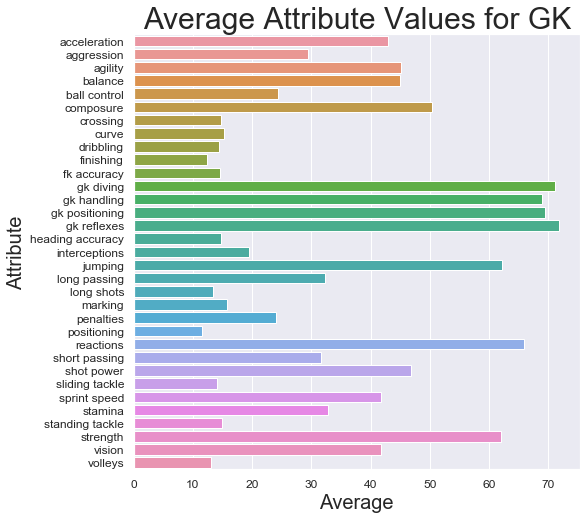

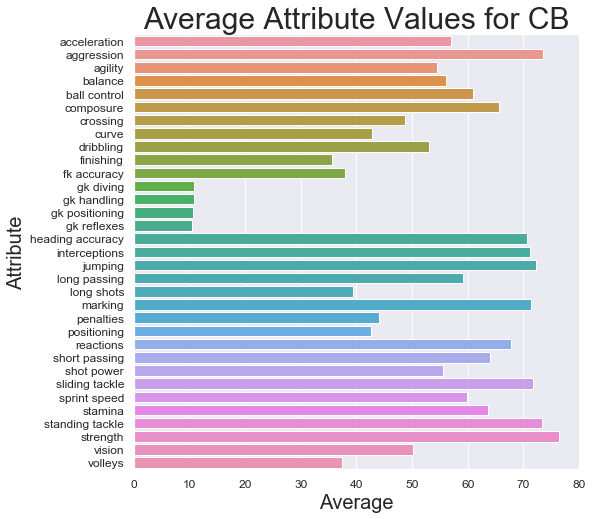

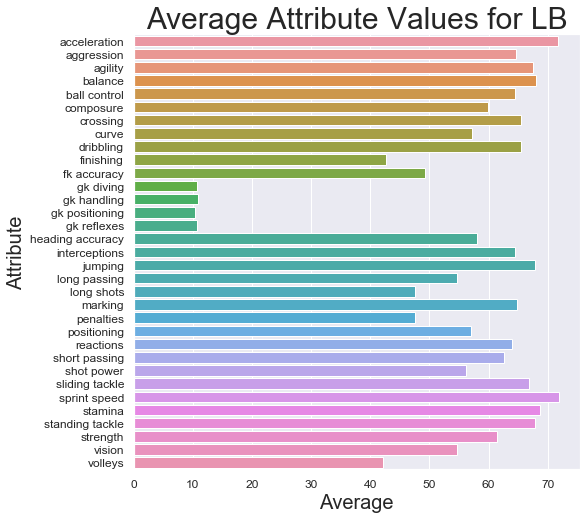

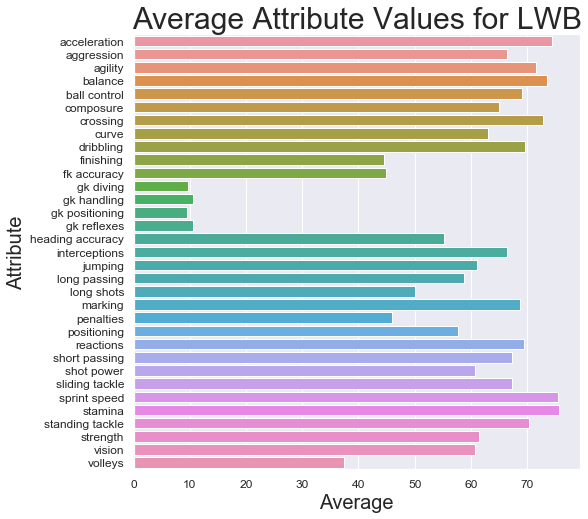

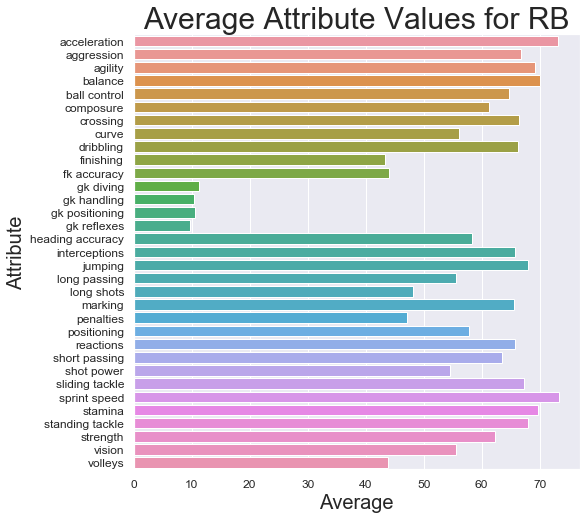

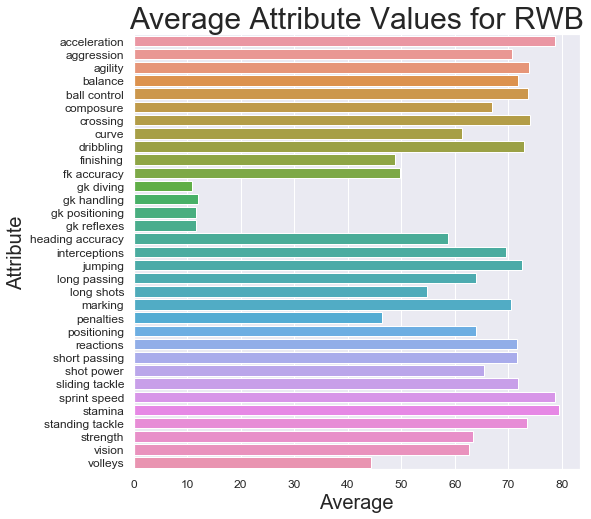

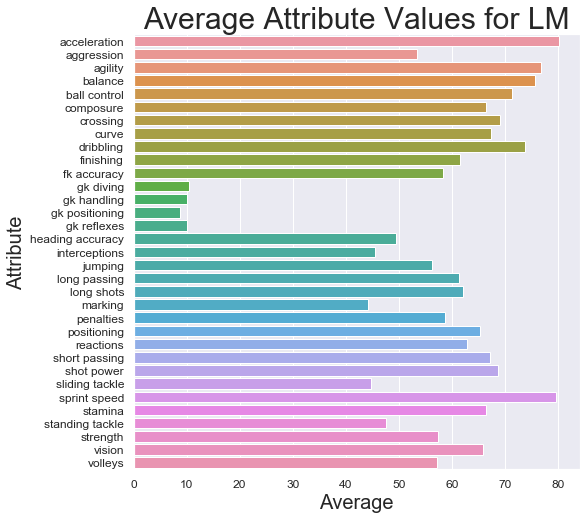

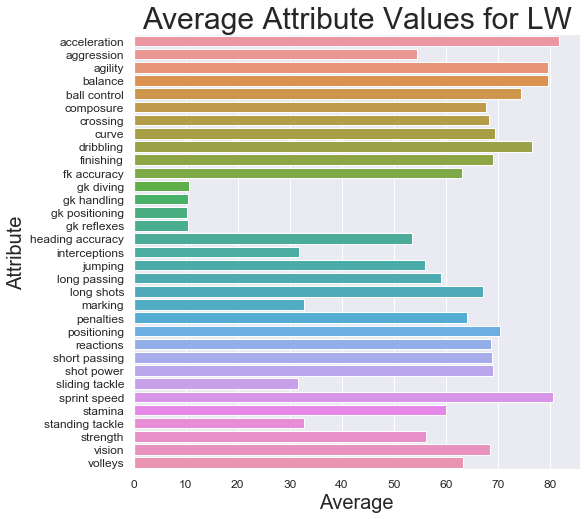

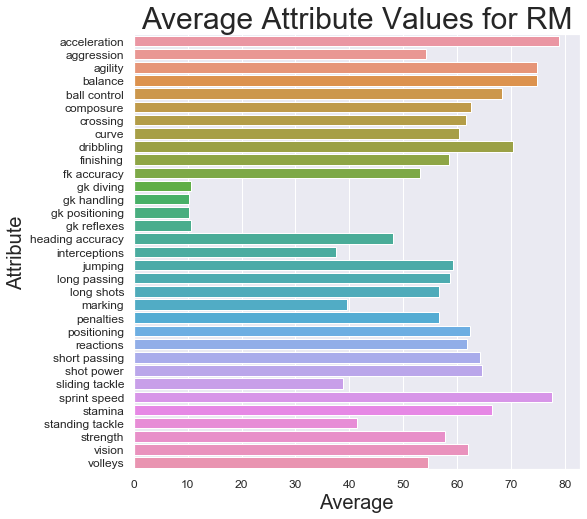

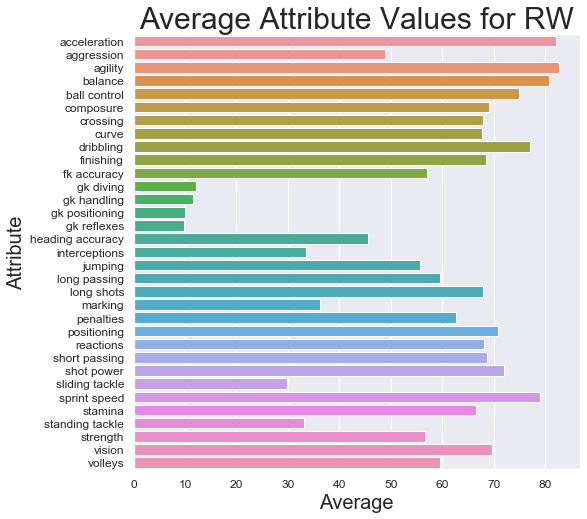

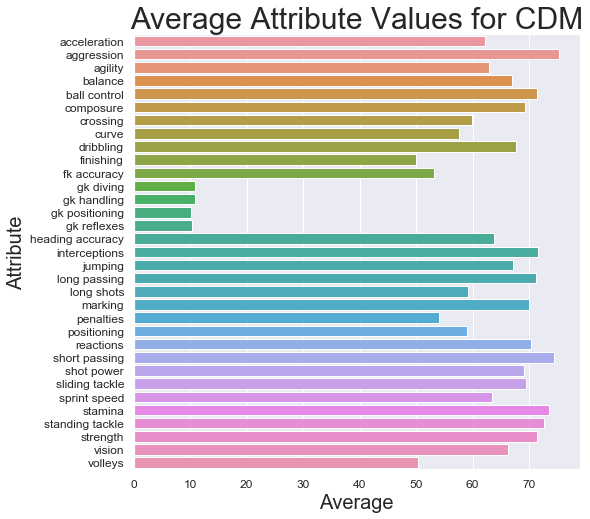

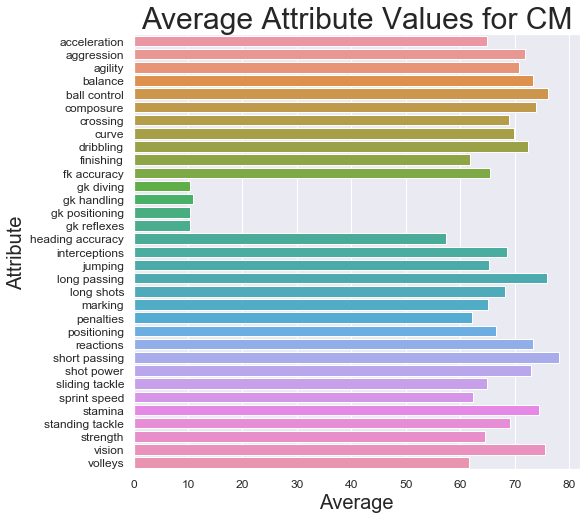

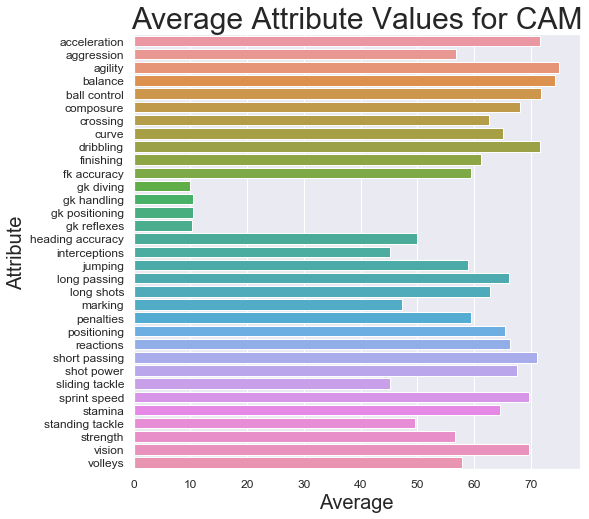

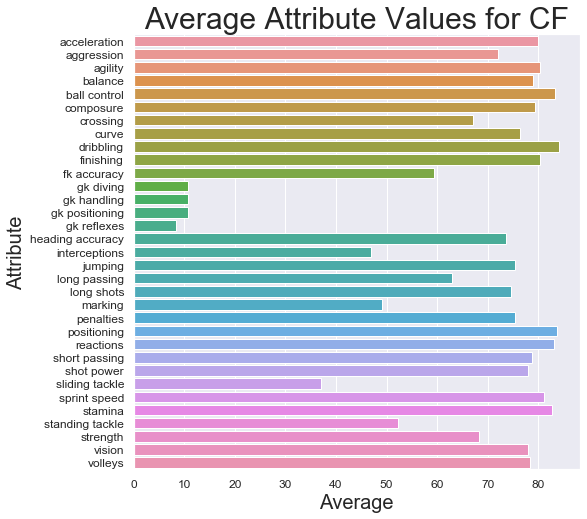

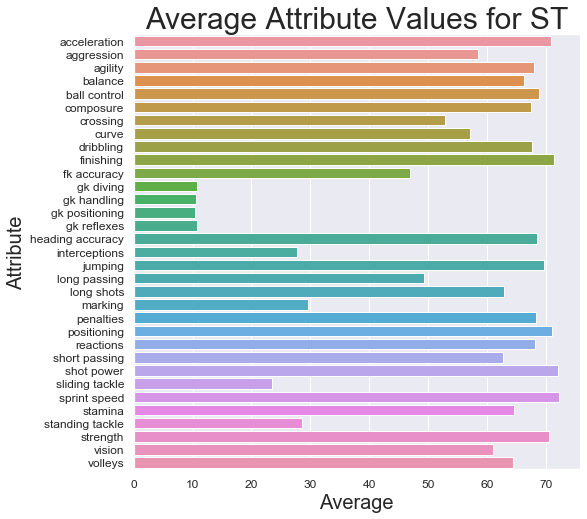

In [1637]:
# loop the plots for ordered positions
values = ['GK', 'CB', 'LB', 'LWB', 'RB', 'RWB', 'LM', 'LW', 'RM', 'RW', 'CDM', 'CM', 'CAM', 'CF', 'ST']
for value in values:
    plot(playersDataEPL, 'bp', value)

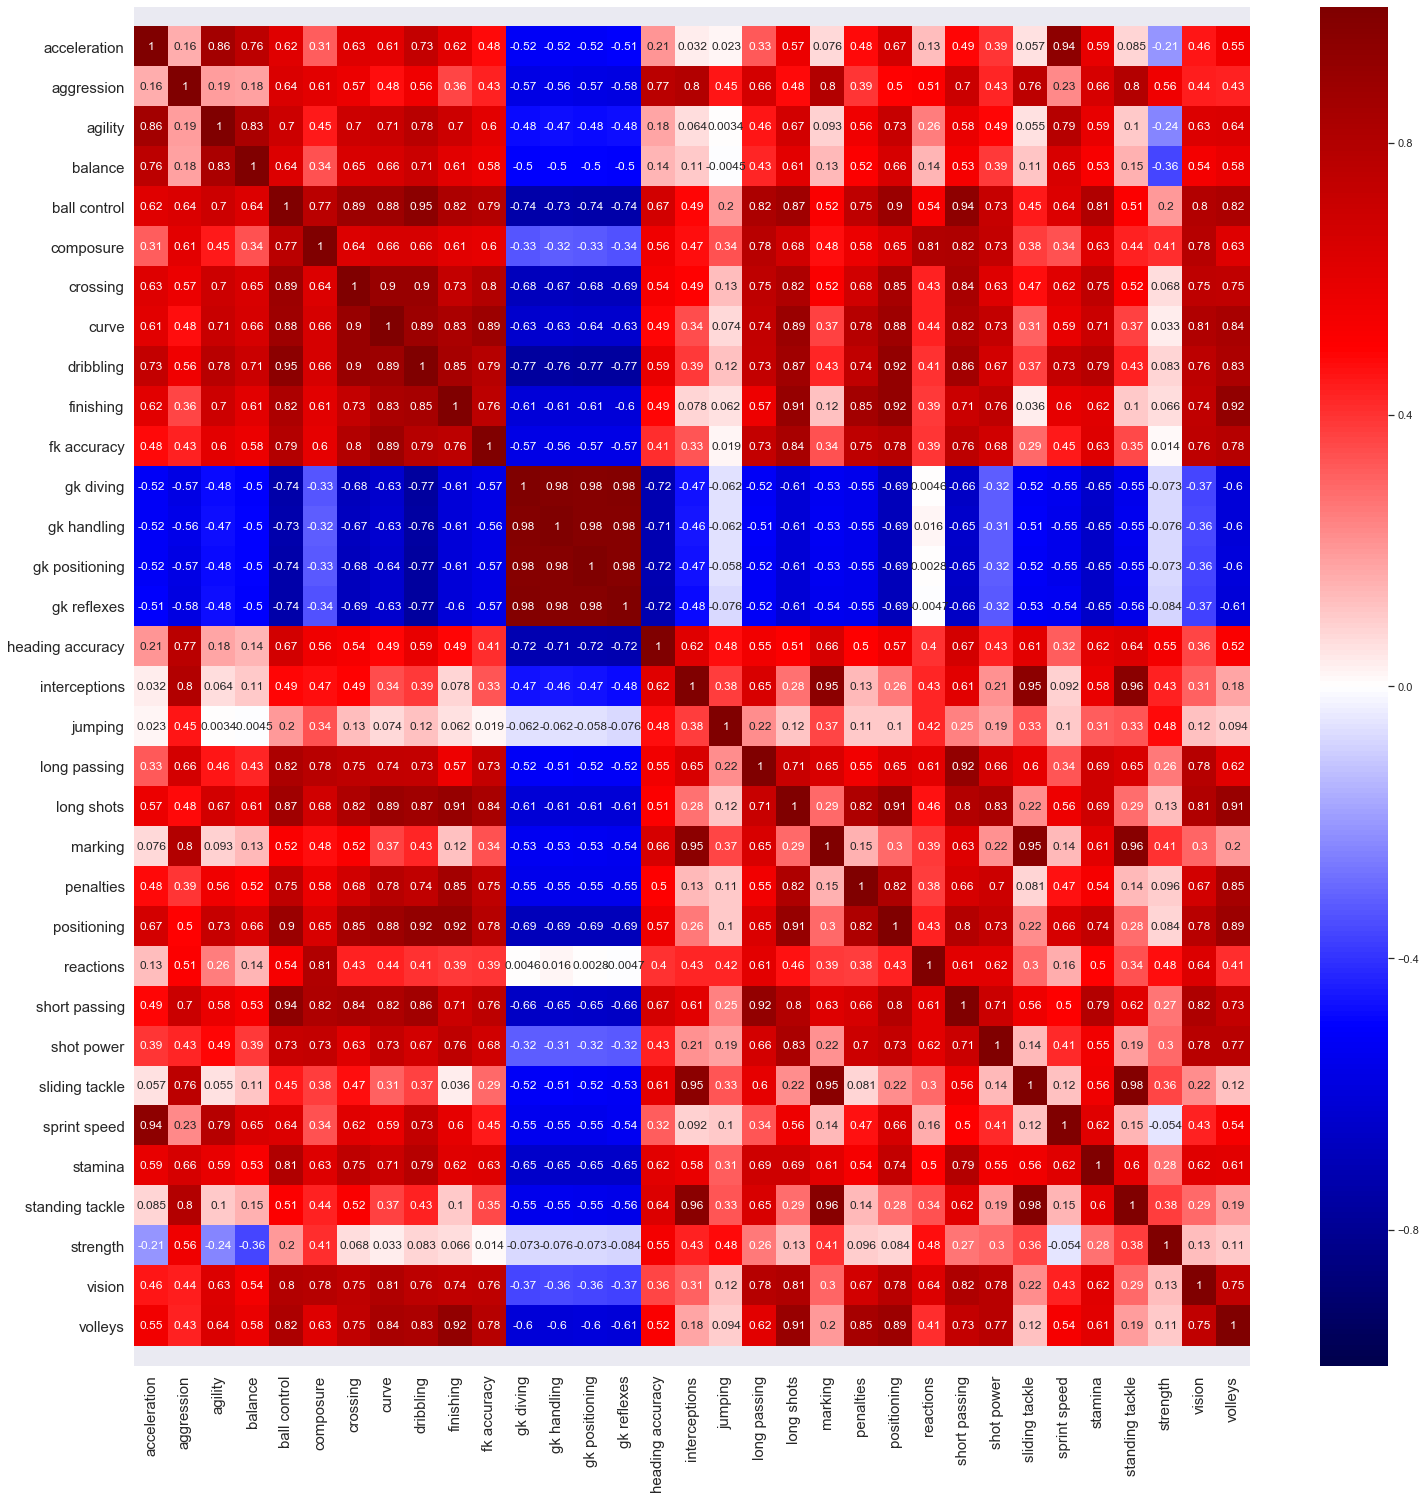

In [1638]:
# temp df
cols = playersDataEPL.columns[9:42].tolist()
_df = playersDataEPL[sorted(cols)]
# heatmap
plt.figure(figsize=(25,25))
sns.heatmap(_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

# visual adjustments
plt.xticks(size=15)
plt.yticks(size=15)
plt.gca().set_ylim(len(_df.corr())+0.5, -0.5)
plt.yticks(rotation=0);

Ok. We have a way to form the following groups of attributes through interactions between highly correlated features. And, we modify them with the help of position specific bar plots.
 - **movement:** All movement related attributes here.
 - **pyhsical:** Attributes such as `standing tackle`, `sliding tackle`, `marking`, `aggression`,  and `interception` show high correlation as a group. They are the core attributes of defenders. We can add heading accuracy to this group. Because, it is an essential ability to score goals from the corner passes given the `strength` and size of the defenders. Also, heading an air ball to the correct direction while defending can result with a counter attack. And that requires hefty amount of strength. Now, that is priceless!
 - **shooting:** All the attributes except `positioning` are easy to relate. `positioning`'s relation to shooting is pretty simple actually. It is more like being at the right place at the right time.
 - **technical:** Any attribute that one needs to be born with to possess.
 - **mental:** These attributes are the defining the character of one's mental strength. `stamina` alone is the fuel of that. The rest are the core components of a good player.
 - **goalkeeping:** These attributes are very unique to goalkeepers.

In [1639]:
# add average features for each group

col1 = playersDataEPL[['acceleration', 'sprint speed', 'agility', 'balance']]
playersDataEPL['movement'] = col1.mean(axis=1)

col2 = playersDataEPL[['interceptions', 'marking', 'standing tackle', 'sliding tackle', 
                       'aggression', 'heading accuracy', 'jumping', 'strength']]
playersDataEPL['physical'] = col2.mean(axis=1)

col3 = playersDataEPL[['volleys', 'positioning', 'curve', 'finishing', 'fk accuracy', 
                       'long shots', 'penalties', 'shot power']]
playersDataEPL['shooting'] = col3.mean(axis=1)

col4 = playersDataEPL[['crossing', 'dribbling', 'ball control', 'long passing', 'short passing']]
playersDataEPL['technical'] = col4.mean(axis=1)

col5 = playersDataEPL[['vision', 'composure', 'reactions', 'stamina']]
playersDataEPL['mental'] = col5.mean(axis=1)

col6 = playersDataEPL[['gk diving', 'gk handling', 'gk positioning', 'gk reflexes']]
playersDataEPL['goalkeeping'] = col6.mean(axis=1)

In [1640]:
#Separate our features from our target
cols = ['age', 'ova', 'pot', 'bms',  
        'movement', 'physical', 'shooting', 'technical', 'mental', 'goalkeeping']
X = playersDataEPL.loc[:,cols]

y = playersDataEPL['wage']

# run the model
split_and_validate(X, y)

There are 110 negative predictions.

Train R^2 score is: 0.4651232152254395
Validation R^2 score is: 0.46454231629794357

Feature coefficient results: 

age : 352.13
ova : 3230.04
pot : 1203.26
bms : -819.88
movement : -145.13
physical : -435.65
shooting : 164.09
technical : 48.44
mental : 94.65
goalkeeping : -174.30


Not much of an improvement, but an improvement! Let's look at the pair plot one more time to refresh.

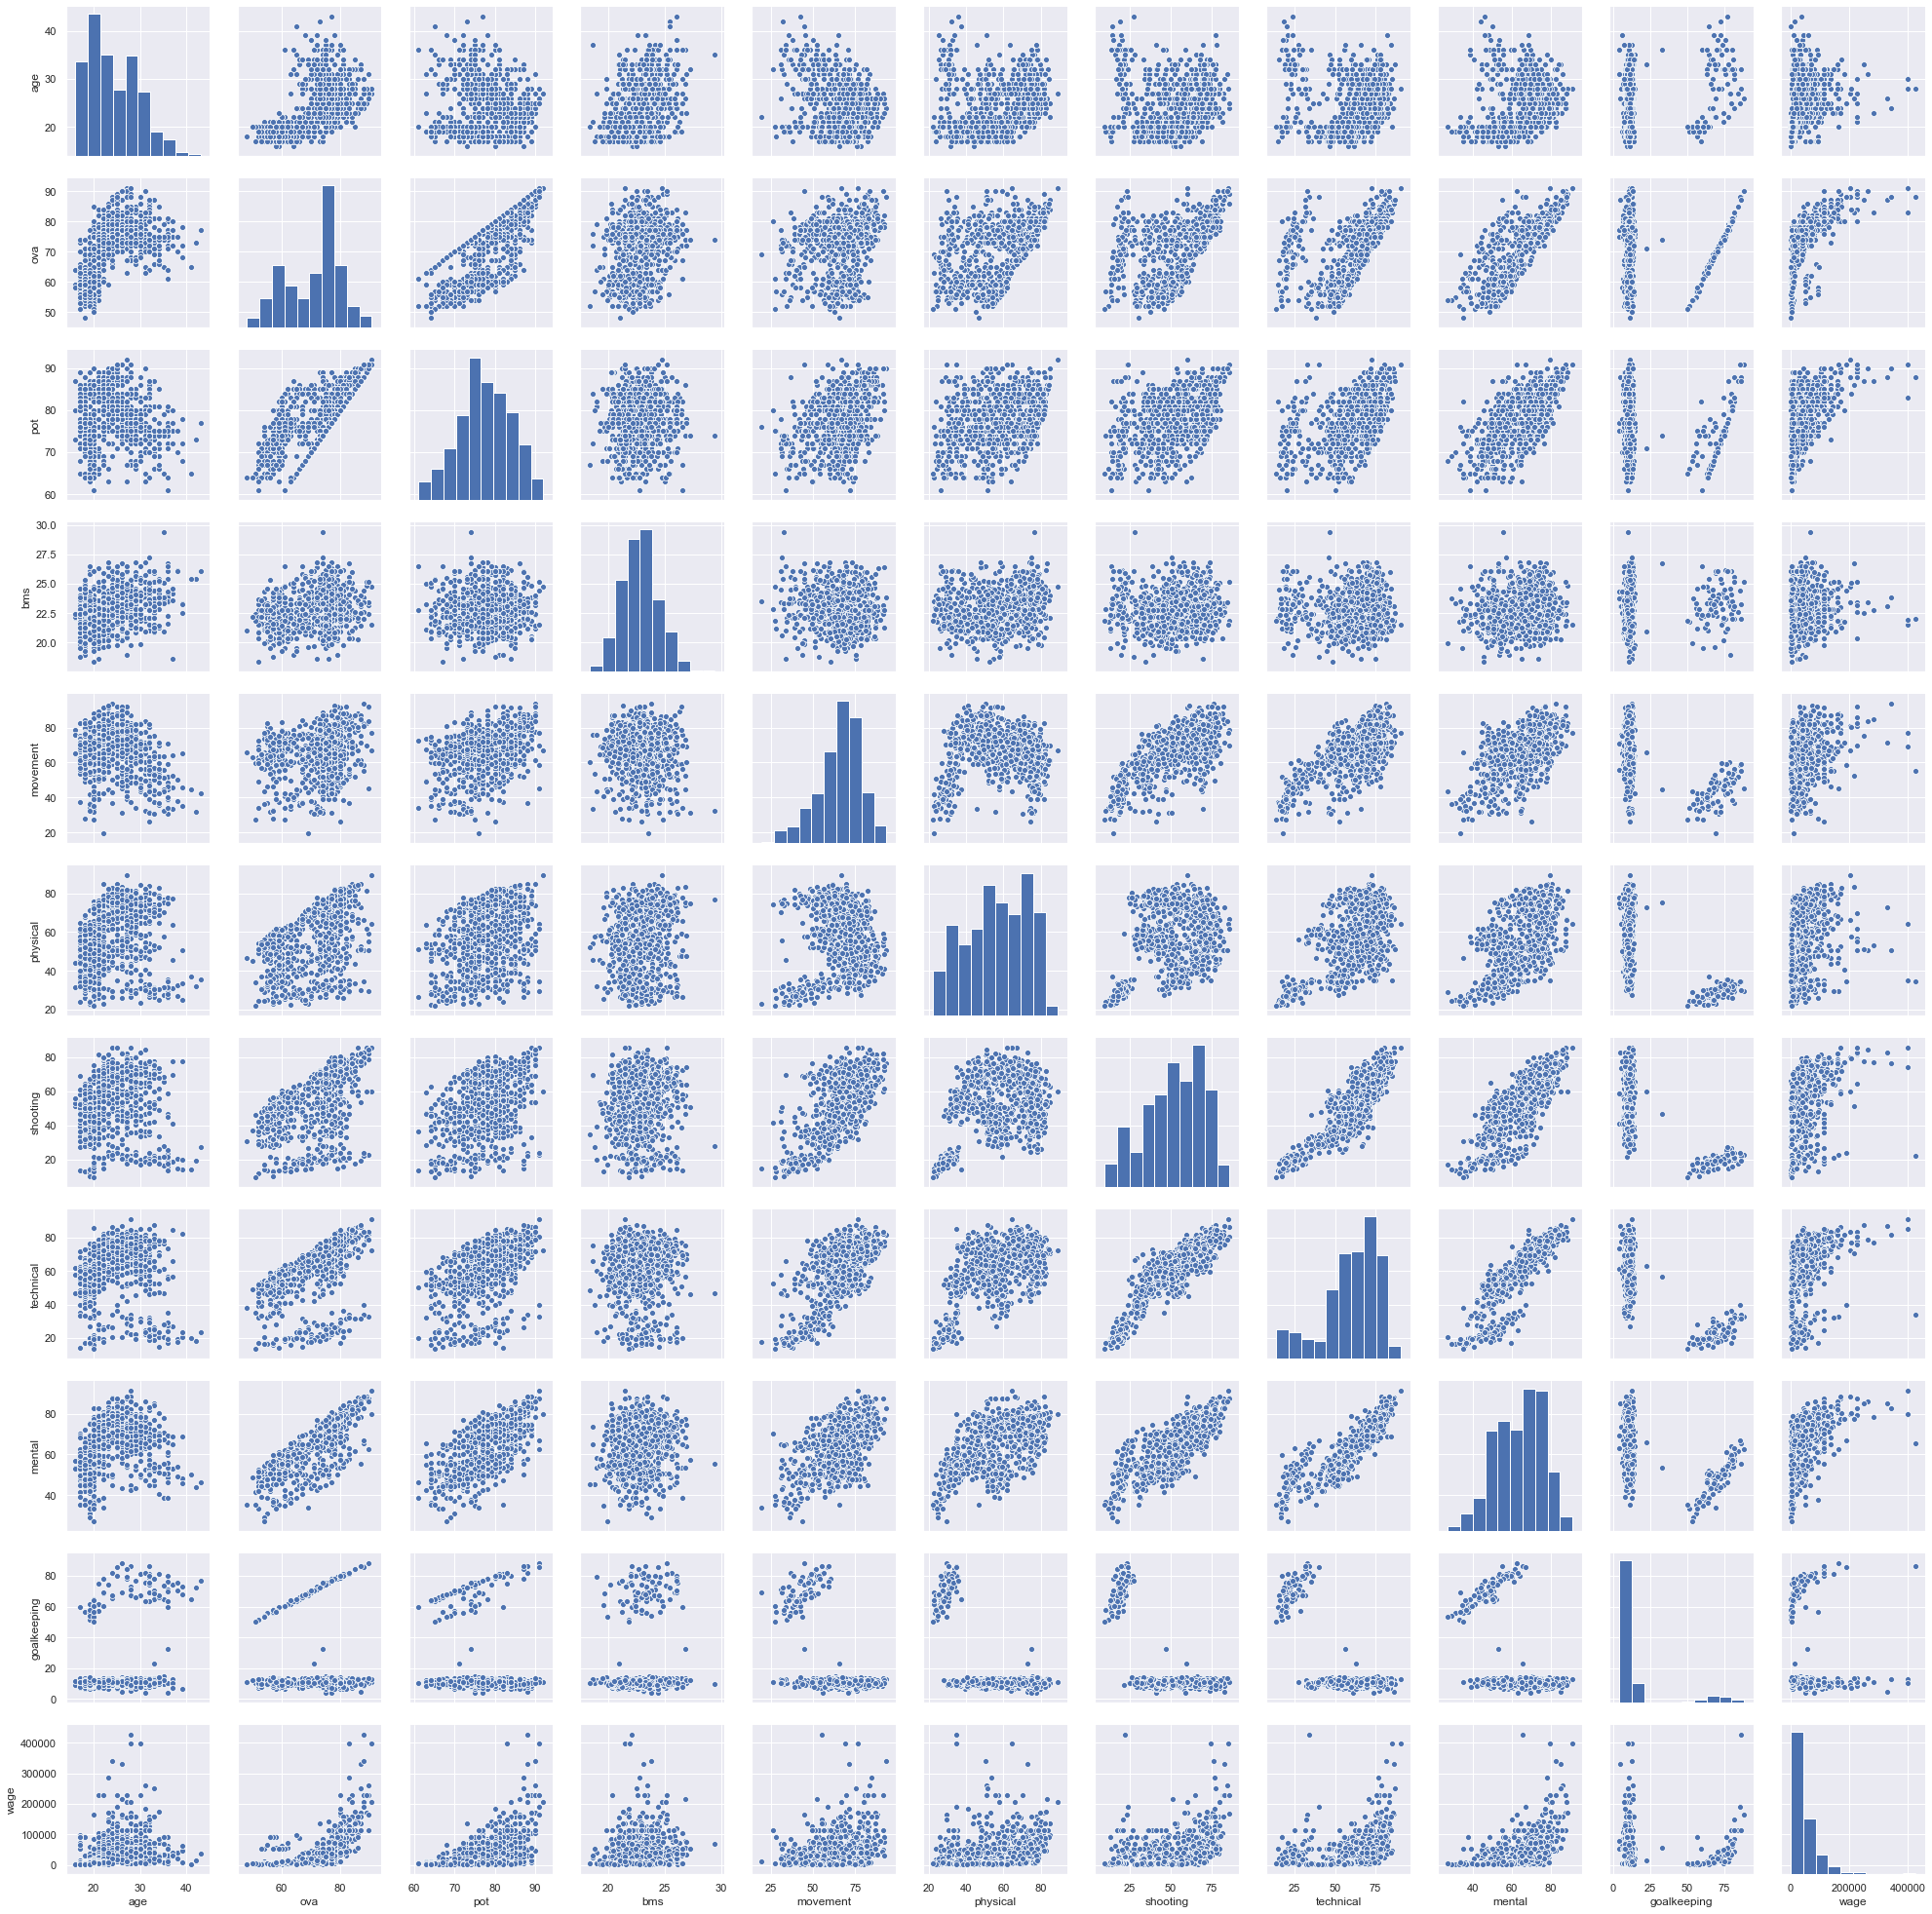

In [1608]:
sns.pairplot(playersDataEPL[['age', 'ova', 'pot', 'bms','movement', 'physical', 'shooting', 
                             'technical', 'mental', 'goalkeeping', 'wage']]);

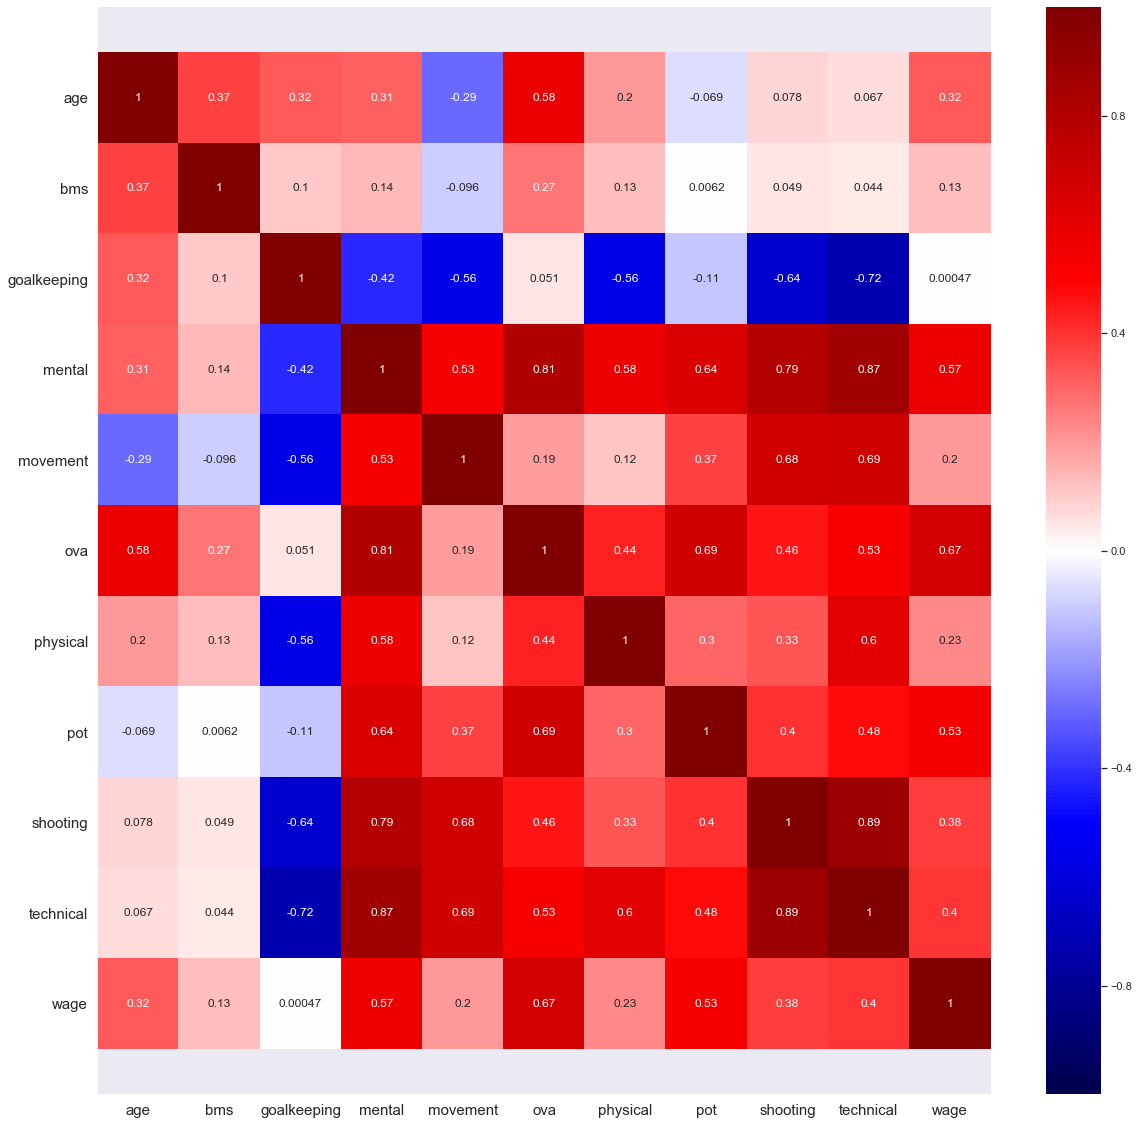

In [1610]:
# temp df
cols = ['age', 'ova', 'pot', 'bms','movement', 'physical', 'shooting', 'technical', 'mental', 'goalkeeping', 'wage']
_df = playersDataEPL[sorted(cols)]
# heatmap
plt.figure(figsize=(20,20))
sns.heatmap(_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

# visual adjustments
plt.xticks(size=15)
plt.yticks(size=15)
plt.gca().set_ylim(len(_df.corr())+0.5, -0.5)
plt.yticks(rotation=0);

We may be able to utilize the non-linear relationship between the `ova`, `technical`, ` shooting` , `mental`, `goalkeeping` attributes and the target.

Also, let's not worry about the collinearity. We can take care of that when we regularize.

### 3) Adding Polynomial Terms

Let's start with `ova`.

In [1641]:
# set the quadratic feature
playersDataEPL['ova^2'] = playersDataEPL['ova'] ** 2

In [1642]:
#Separate our features from our target
cols = ['age', 'ova', 'pot', 'bms',  
        'movement', 'physical', 'shooting', 'technical', 'mental', 'goalkeeping',
        'ova^2']
X = playersDataEPL.loc[:,cols]
y = playersDataEPL['wage']

# run the model
split_and_validate(X, y)

There are 46 negative predictions.

Train R^2 score is: 0.6499577935260582
Validation R^2 score is: 0.6490212915083462

Feature coefficient results: 

age : 1155.98
ova : -34323.35
pot : 847.50
bms : -266.82
movement : -282.04
physical : -418.25
shooting : 118.26
technical : 480.31
mental : -427.61
goalkeeping : -181.11
ova^2 : 272.19


An incredible 18% boost! Now the model is more sensitive to changes in `ova` due to the polynomial transformation. And the number of negative predictions dropped to 46!

Let's add more complexity.

In [1644]:
# set the quadratic features
playersDataEPL['technical^2'] = playersDataEPL['technical'] ** 2
playersDataEPL['shooting^2'] = playersDataEPL['shooting'] ** 2
playersDataEPL['mental^2'] = playersDataEPL['mental'] ** 2

In [1647]:
#Separate our features from our target
cols = ['age', 'ova', 'pot', 'bms',  
        'movement', 'physical', 'shooting', 'technical', 'mental', 'goalkeeping',
        'ova^2', 'technical^2', 'shooting^2', 'mental^2']
X = playersDataEPL.loc[:,cols]
y = playersDataEPL['wage']

# run the model
split_and_validate(X, y)

There are 37 negative predictions.

Train R^2 score is: 0.6534736360505625
Validation R^2 score is: 0.6464289096653073

Feature coefficient results: 

age : 1101.41
ova : -34209.09
pot : 895.92
bms : -228.01
movement : -214.19
physical : -327.84
shooting : -1502.34
technical : 469.46
mental : 890.54
goalkeeping : -275.70
ova^2 : 269.88
technical^2 : 0.53
shooting^2 : 15.59
mental^2 : -10.68


In [1678]:
#Separate our features from our target
cols = ['age', 'ova',  
        'movement', 'physical', 'shooting', 'technical', 'mental', 'goalkeeping',
        'ova^2', 'technical^2', 'shooting^2', 'mental^2']
X = playersDataEPL.loc[:,cols]
y = playersDataEPL['wage']

# run the model
split_and_validate(X, y)

There are 39 negative predictions.

Train R^2 score is: 0.6491600855949772
Validation R^2 score is: 0.6582195032777172

Feature coefficient results: 

age : 307.38
ova : -34084.70
movement : -239.91
physical : -349.19
shooting : -1457.09
technical : 350.25
mental : 1269.79
goalkeeping : -284.34
ova^2 : 273.87
technical^2 : 1.39
shooting^2 : 15.07
mental^2 : -13.44


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


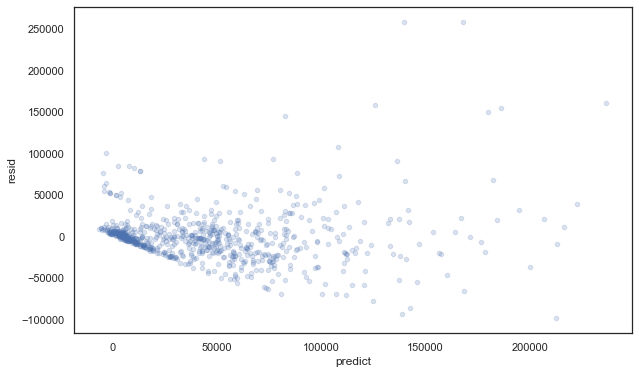

In [1666]:
lr = LinearRegression()
fit = lr.fit(X,y)

playersDataEPL['predict']=fit.predict(X)
playersDataEPL['resid']=playersDataEPL.wage-playersDataEPL.predict
with sns.axes_style('white'):
    plot=playersDataEPL.plot(kind='scatter',
                  x='predict',y='resid',alpha=0.2,figsize=(10,6))

In [1445]:
playersDataEPL[playersDataEPL['predict'] <= 0].shape[0]

13

### 4) Adding and Interacting Features

The score has dropped by 1.6%! It is not too much, but I see the signs of potential overfitting. Maybe interacting the attributes based on certain analysis can change this around.

In [1555]:
# add average features for each group
col1 = playersDataEPL[['strength', 'bms']]
playersDataEPL['physical'] = col1.mean(axis=1)

col2 = playersDataEPL[['acceleration', 'sprint speed', 'agility', 'balance']]
playersDataEPL['movement'] = col2.mean(axis=1)

col3 = playersDataEPL[['interceptions', 'marking', 'standing tackle', 'sliding tackle', 
                       'aggression', 'heading accuracy', 'jumping', 'strenght']]
playersDataEPL['physical'] = col3.mean(axis=1)

col4 = playersDataEPL[['volleys', 'positioning', 'curve', 'finishing', 'fk accuracy', 
                       'long shots', 'penalties', 'shot power']]
playersDataEPL['shooting'] = col4.mean(axis=1)

col5 = playersDataEPL[['crossing', 'dribbling', 'ball control', 'long passing', 'short passing']]
playersDataEPL['technical'] = col5.mean(axis=1)

col6 = playersDataEPL[['vision', 'composure', 'reactions', 'stamina']]
playersDataEPL['mental'] = col6.mean(axis=1)

col7 = playersDataEPL[['gk diving', 'gk handling', 'gk positioning', 'gk reflexes']]
playersDataEPL['goalkeeping'] = col7.mean(axis=1)

Adnd we must zero out the goalkeeping attributes for those are not goalkeepers.

In [1556]:
playersDataEPL['goalkeeping'] = np.where(playersDataEPL['bp'] != 'GK', 0, playersDataEPL['goalkeeping'])

In [1560]:
#Separate our features from our target
cols = ['age', 'ova', 'pot', 'ova^2', 
        'movement', 'defensive', 'physical', 'shooting', 'technical', 'mental', 'goalkeeping']
X = playersDataEPL.loc[:,cols]

y = playersDataEPL['wage']

# run the model
split_and_validate(X, y)

There are 47 negative predictions.

Train R^2 score is: 0.6503759443425651
Validation R^2 score is: 0.6491138134911714

Feature coefficient results: 

age : 1159.70
ova : -34778.60
pot : 910.09
ova^2 : 273.60
movement : -243.40
defensive : -401.94
physical : 201.54
shooting : 90.09
technical : 630.44
mental : -430.13
goalkeeping : -72.97


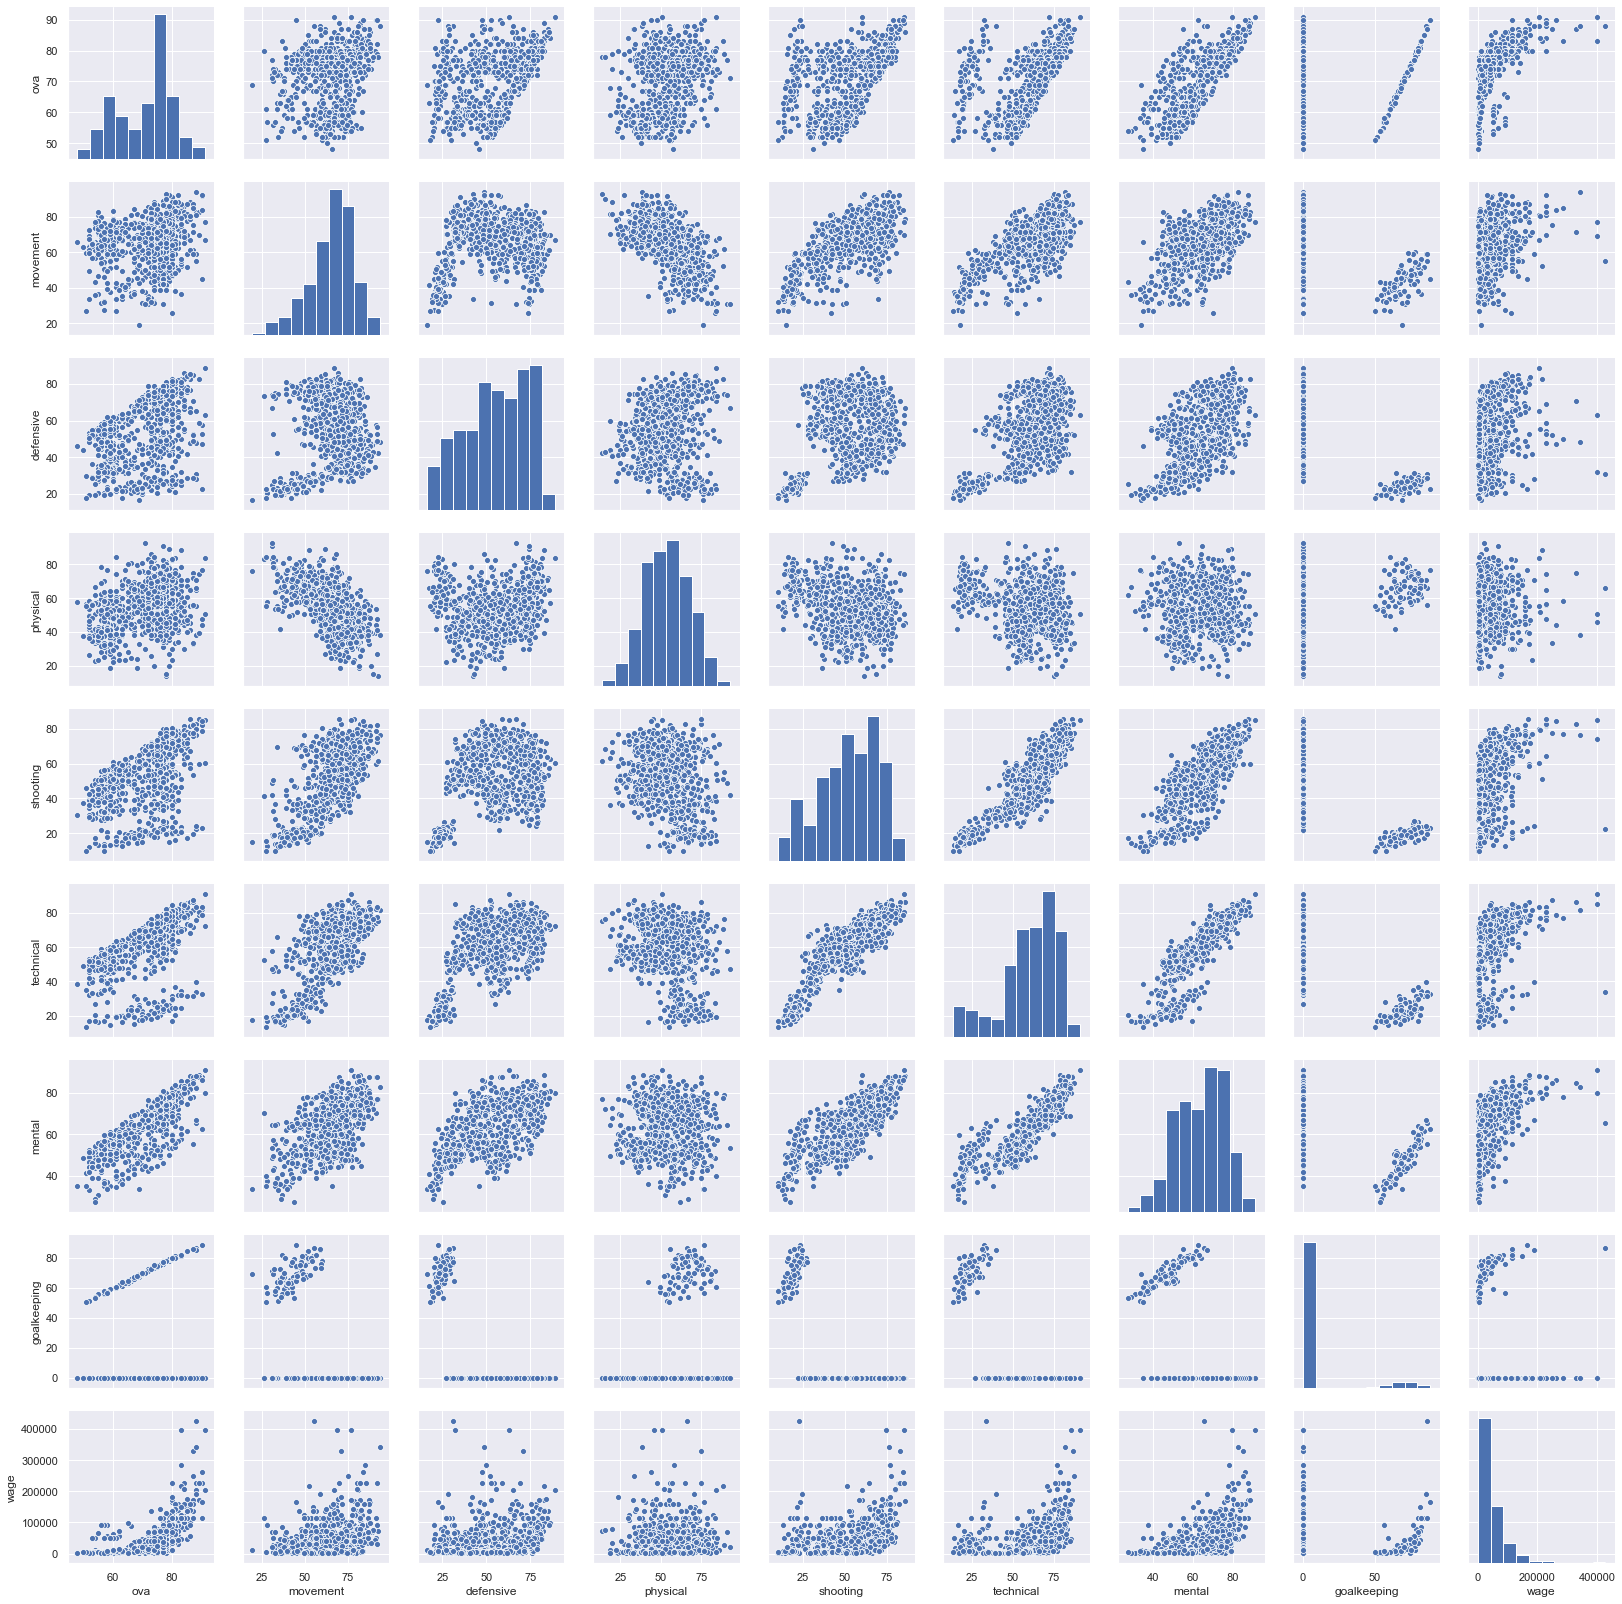

In [1344]:
sns.pairplot(playersDataEPL[['ova','movement', 'defensive', 'physical', 'shooting', 'technical', 'mental', 'goalkeeping', 
                             'wage']]);

`ova` may be a good indicator of the player's worth in this model with the highest coefficient so far. But I believe I can find a better way or a way to supplement `ova`. Because, some players are getting punished by the weaker abilities. To illustrate, a Central Attacking Midfielder should not be valued on how well he tackles 100%. His main decider attributes should be anything over certain threshold of the average attribute in the league. For example, average `short passing` points for a CAM in EPL 71.112 over 100. If I set the threshold at 65 and bring in the average attribute points of the attributes with league point average over 65 for a CAM, I believe it is more fair. 

In [1060]:
df_roles = playersDataEPL.groupby('role').mean().iloc[:, 3:36]
df_roles

crossing  finishing  heading accuracy  short passing  volleys  \
role                                                                            
Attacker          53.296     71.643            68.612         63.082   64.816   
Cen-Defender      48.699     35.673            70.679         64.026   37.429   
Def-Winger        67.545     43.792            58.020         64.356   42.782   
Goalkeeper        14.771     12.313            14.807         31.663   13.060   
Midfielder        64.885     56.522            60.168         76.434   56.628   
Off-Midfielder    62.579     61.140            49.963         71.112   57.925   
Winger            65.236     61.849            48.632         66.189   56.953   

                dribbling   curve  fk accuracy  long passing  ball control  \
role                                                                         
Attacker           68.122  57.633       47.265        49.735        69.255   
Cen-Defender       53.109  42.808       37.942        59.244        60.865   
Def-Winger         67.040  57.723       46.772        56.495        66.050   
Goalkeeper         14.422  15.277       14.602        32.241        24.446   
Midfielder         70.301  64.451       59.991        73.850        74.018   
Off-Midfielder     71.533  65.084       59.458        66.103        71.785   
Winger             72.840  64.264       56.094        59.528        70.708   

                acceleration  sprint speed  agility  reactions  balance  \
role                                                                      
Attacker              71.051        72.378   68.367     68.551   66.663   
Cen-Defender          56.942        59.801   54.494     67.859   56.103   
Def-Winger            73.416        73.564   69.287     66.020   69.703   
Goalkeeper            43.024        41.699   45.120     65.940   45.012   
Midfielder            63.690        62.796   67.230     72.088   70.496   
Off-Midfielder        71.617        69.636   74.897     66.290   74.327   
Winger                79.934        78.660   76.981     63.755   76.425   

                shot power  jumping  stamina  strength  long shots  \
role                                                                 
Attacker            72.214   69.704   65.041    70.398      63.224   
Cen-Defender        55.571   72.308   63.692    76.346      39.481   
Def-Winger          56.950   67.901   70.960    62.079      48.861   
Goalkeeper          46.892   62.253   32.867    62.048      13.386   
Midfielder          71.204   66.133   74.088    67.602      64.177   
Off-Midfielder      67.570   58.972   64.505    56.617      62.841   
Winger              67.189   57.500   65.745    57.283      60.858   

                aggression  interceptions  positioning  vision  penalties  \
role                                                                        
Attacker            58.908         28.255       71.296  61.551     68.510   
Cen-Defender        73.577         71.115       42.712  50.199     44.064   
Def-Winger          66.416         65.762       58.287  56.515     47.099   
Goalkeeper          29.494         19.494       11.590  41.747     24.072   
Midfielder          73.407         69.903       63.177  71.398     58.602   
Off-Midfielder      56.813         45.252       65.364  69.692     59.477   
Winger              53.236         38.453       65.245  64.811     58.840   

                composure  marking  standing tackle  sliding tackle  \
role                                                                  
Attacker           67.714   30.143           29.224          23.929   
Cen-Defender       65.538   71.321           73.333          71.686   
Def-Winger         61.733   66.089           68.772          67.624   
Goalkeeper         50.434   15.699           14.880          14.120   
Midfielder         71.903   67.274           70.699          66.841   
Off-Midfielder     68.075   47.308           49.589          45.150   
Winger        

In [1069]:
# set strong attribute for GK
roles = playersDataEPL.role.unique()
playersDataEPL['true_ova'] = 0

for role in roles:
    playersDataEPL['true_ova'] = np.where(playersDataEPL['role'] == role, 
                                               playersDataEPL[select_threshold(df_roles, role, 70)]
                                               .mean(axis=1), playersDataEPL['true_ova'])

In [1113]:
playersDataEPL['ova^2'] = playersDataEPL['ova'] ** 2

In [1129]:
#Separate our features from our target
X4 = playersDataEPL.loc[:, ['age', 'ova', 'true_ova']]

y = playersDataEPL['wage']

# run the model
split_and_validate(X4, y)


Validation R^2 score was: 0.4607860485579379
Feature coefficient results: 

age : -776.80
ova : 4449.68
true_ova : -504.21


Not much of an improvement. I wonder why. This should work well.

I am suprised to see a lower absolute coefficient for `true_ova` than `ova`. I want to take a closer look at that.

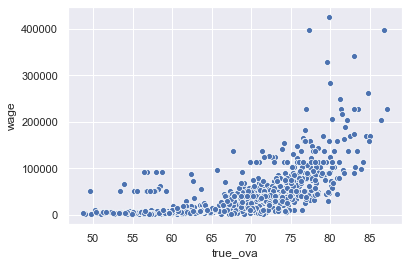

In [1099]:
# true overall vs wage
sns.scatterplot(x='true_ova', y='wage',  data=playersDataEPL);

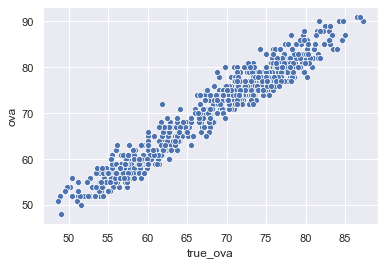

In [1111]:
# true overall vs overall
sns.scatterplot(x='true_ova', y='ova',  data=playersDataEPL);

In [1121]:
playersDataEPL.corr()['ova']['true_ova']

0.9700842519111058

Hmm.I need to take some power from `ova`. I see two important things. First is the upward relationship between the feature and the target. Second is the collinearity between two features. In this case I will add a quadratic polynomial term to `true_ova`. That way, I aim to express that non-linear realtionship in the linear model!

### 5) Adding Polynomial Term

Let's go ahead and get it done!

In [ ]:
playersDataEPL['ova^2'] = playersDataEPL['ova'] ** 2

### 5) More Feature Interaction

I want to generalize the attributes based on heir nature. THis may help a little. The groupings are very straight forward. 

That is another 2% boost. Next, I can try adding the preferred positions. But first let's examine how the wage is distributed by positions.

### 6) Adding Preferred Positions

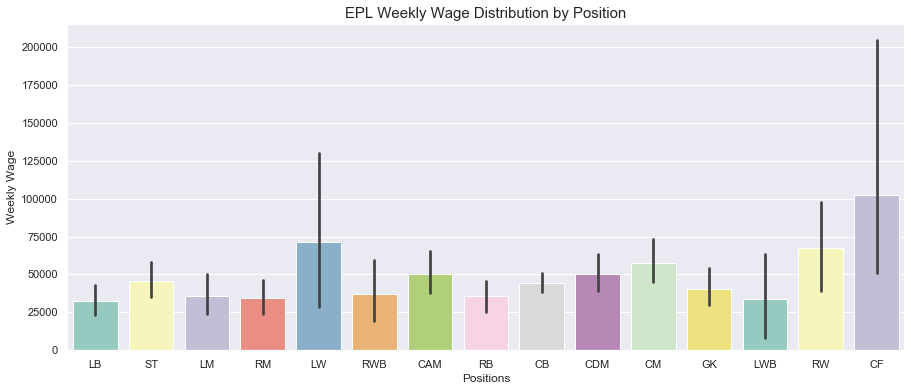

In [793]:
plt.figure(figsize=(15, 6))
sns.barplot(x="bp", y = 'wage', data=playersDataEPL, palette="Set3")
plt.xlabel('Positions')
plt.ylabel('Weekly Wage')
plt.title('EPL Weekly Wage Distribution by Position', size=15);

Ok. This may be worth a shot. I see some serious outliers as I mention in the descriptive statistics analysis.

In [794]:
#define the role dictionary
role_dict = {'LW': 'Winger', 'LWB': 'Defensive Winger', 'RM': 'Winger', 'LM': 'Winger', 
             'ST': 'Attacker', 'CAM': 'Offensive Midfielder', 'LB': 'Defensive Winger', 'RWB': 'Defensive Winger', 
             'RB': 'Defensive Winger', 'CB': 'Central Defender','CM': 'Midfielder', 'CDM': 'Midfielder', 
             'GK': 'Goalkeeper', 'RW': 'Winger', 'CF': 'Attacker'}

# apply
playersDataEPL['role'] = playersDataEPL['bp'].map(role_dict)

In [795]:
# OHE!
positions = playersDataEPL.role.str.get_dummies()
positions.shape

(764, 7)

In [796]:
# mergeplayersDataEPL = playersDataEPL.merge(positions,left_index=True,right_index=True)
playersDataEPL.head(2)


name_short               team nationality  age  ova  pot   foot  bp  \
0   B. Williams  Manchester United     England   18   71   86  Right  LB   
1  M. Greenwood  Manchester United     England   17   73   89   Left  ST   

   value  crossing  finishing  heading accuracy  short passing  volleys  \
0  €4.5M        63         54                59             69       53   
1    €8M        64         74                64             69       61   

   dribbling  curve  fk accuracy  long passing  ball control  acceleration  \
0         72     57           30            59            70            79   
1         72     67           65            65            70            78   

   sprint speed  agility  reactions  balance  shot power  jumping  stamina  \
0            84       76         68       64          68       72       74   
1            81       78         70       64          76       63       69   

   strength  long shots  aggression  interceptions  positioning  vision  \
0        62          50          80             71           65      60   
1        65          72          55             34           73      69   

   penalties  composure  marking  standing tackle  sliding tackle  gk diving  \
0         41         70       68               67              67         10   
1         64         73       35               39              33          5   

   gk handling  gk positioning  gk reflexes  height_cm  weight_kg  \
0           13               7            7     182.88     69.854   
1            6               9            8     185.42     69.854   

                       league  last_name       wage    predict      resid  \
0  English Premier League (1)   Williams  14350.463  56291.417 -41940.954   
1  English Premier League (1)  Greenwood  15375.496  65783.564 -50408.069   

   bio-score  attribute_avg  physical  mental  technical  defending  passing  \
0  12774.889         55.343     71.00   69.50       61.2      68.25   63.667   
1  12952.318         53.873     68.75   66.75       68.8      35.25   66.000   

   movement  shooting  goalkeeping              role  Attacker  \
0      73.0      49.6         9.25  Defensive Winger         0   
1      74.0      68.2         7.00          Attacker         1   

   Central Defender  Defensive Winger  Goalkeeper  Midfielder  \
0                 0                 1           0           0   
1                 0                 0           0           0   

   Offensive Midfielder  Winger  
0                     0       0  
1                     0       0

In [797]:
playersDataEPL.role.unique()

array(['Defensive Winger', 'Attacker', 'Winger', 'Offensive Midfielder',
       'Central Defender', 'Midfielder', 'Goalkeeper'], dtype=object)

I really hate to add features. I don't think it is a smart way of tackling this problem. I replace the attribute groups with the roles and observe.

In [798]:
#Separate our features from our target
X6 = playersDataEPL.loc[:, ['age', 'ova', 'attribute_avg', 
                            'Defensive Winger', 'Attacker', 'Winger', 'Offensive Midfielder',
                            'Central Defender', 'Midfielder', 'Goalkeeper']]

y = playersDataEPL['wage']

# run the model
split_and_validate(X6, y)


Validation R^2 score was: 0.5239767883460753
Feature coefficient results: 

age : -182.24
ova : 4215.11
attribute_avg : -1795.36
Defensive Winger : 4502.82
Attacker : 1102.73
Winger : 7176.66
Offensive Midfielder : 13895.09
Central Defender : -4239.90
Midfielder : 6530.39
Goalkeeper : -28967.79


A very slim increase. The positions of the players seem to be more effective than attributes in the calculation of wage. There is a high possibility that `ova` accounts for the positional averages. And adding the generalized version of the positions contributed well in that. Before I progress to next trial, I wan tto try something. I wish to try simplyfying the roles event further and see where that takes the model.

In [799]:
#define the role dictionary
role_dict = {'LW': 'Att', 'LWB': 'Def', 'RM': 'Mid', 'LM': 'Mid', 
             'ST': 'Att', 'CAM': 'Mid', 'LB': 'Def', 'RWB': 'Def', 
             'RB': 'Def', 'CB': 'Def','CM': 'Mid', 'CDM': 'Mid', 
             'GK': 'Gkp', 'RW': 'Att', 'CF': 'Att'}

# apply
playersDataEPL['role_test'] = playersDataEPL['bp'].map(role_dict)

In [800]:
# OHE!
positions = playersDataEPL.role_test.str.get_dummies()
positions.shape

(764, 4)

In [801]:
playersDataEPL = playersDataEPL.merge(positions,left_index=True,right_index=True)
playersDataEPL.head(2)

name_short               team nationality  age  ova  pot   foot  bp  \
0   B. Williams  Manchester United     England   18   71   86  Right  LB   
1  M. Greenwood  Manchester United     England   17   73   89   Left  ST   

   value  crossing  finishing  heading accuracy  short passing  volleys  \
0  €4.5M        63         54                59             69       53   
1    €8M        64         74                64             69       61   

   dribbling  curve  fk accuracy  long passing  ball control  acceleration  \
0         72     57           30            59            70            79   
1         72     67           65            65            70            78   

   sprint speed  agility  reactions  balance  shot power  jumping  stamina  \
0            84       76         68       64          68       72       74   
1            81       78         70       64          76       63       69   

   strength  long shots  aggression  interceptions  positioning  vision  \
0        62          50          80             71           65      60   
1        65          72          55             34           73      69   

   penalties  composure  marking  standing tackle  sliding tackle  gk diving  \
0         41         70       68               67              67         10   
1         64         73       35               39              33          5   

   gk handling  gk positioning  gk reflexes  height_cm  weight_kg  \
0           13               7            7     182.88     69.854   
1            6               9            8     185.42     69.854   

                       league  last_name       wage    predict      resid  \
0  English Premier League (1)   Williams  14350.463  56291.417 -41940.954   
1  English Premier League (1)  Greenwood  15375.496  65783.564 -50408.069   

   bio-score  attribute_avg  physical  mental  technical  defending  passing  \
0  12774.889         55.343     71.00   69.50       61.2      68.25   63.667   
1  12952.318         53.873     68.75   66.75       68.8      35.25   66.000   

   movement  shooting  goalkeeping              role  Attacker  \
0      73.0      49.6         9.25  Defensive Winger         0   
1      74.0      68.2         7.00          Attacker         1   

   Central Defender  Defensive Winger  Goalkeeper  Midfielder  \
0                 0                 1           0           0   
1                 0                 0           0           0   

   Offensive Midfielder  Winger role_test  Att  Def  Gkp  Mid  
0                     0       0       Def    0    1    0    0  
1                     0       0       Att    1    0    0    0

In [802]:
#Separate our features from our target
X6a = playersDataEPL.loc[:, ['age', 'ova', 'attribute_avg', 
                            'Def', 'Mid', 'Gkp', 'Att']]

y = playersDataEPL['wage']

# run the model
split_and_validate(X6a, y)


Validation R^2 score was: 0.5240170703275433
Feature coefficient results: 

age : -315.49
ova : 4206.79
attribute_avg : -1720.01
Def : 3023.43
Mid : 12412.05
Gkp : -23295.66
Att : 7860.18


The alternative feature group lightens the weight on Goalkeeper role just a bit. I do not see any significant increase in R^2. I decide to go with the feature group X6. 

Maybe I can do something with the `foot`. I can try connecting it to the positions.

### 7) Adding Foot
I believe that the left-footed players are pretty dangerous. Roberto Carlos, Gheorghe Hagi and Messi are some of the top left-footed players. My generation is lucky to see them play. 

Given that, I can try factoring in the impact of the foot. Let's verify with a visual.

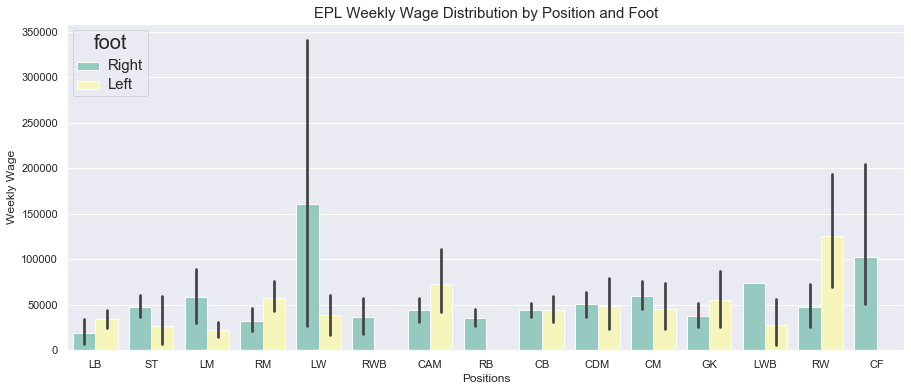

In [763]:
plt.figure(figsize=(15, 6))
ax = sns.barplot(x="bp", y = 'wage', data=playersDataEPL, palette="Set3", hue='foot')
plt.xlabel('Positions')
plt.ylabel('Weekly Wage')
plt.title('EPL Weekly Wage Distribution by Position and Foot', size=15)

plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='20'); # for legend title

Please see the wage of opposite foot players like right-foot LM versus left-footed LM. The other wingers also show similar balance. What gets my serious attention is the CAM position. That makes sense. I witness, countless times, a left-footed CAM causing havoc on the pitch with curved shots from right side facing the goal, hence Messi! And a left-handed Goalie making those saves since the ball travleing to his right and him engaging core with his left (stronger) hand, hence higher wage for left-footed (handed) goalkeeper!

Let's create the field.

## Storage

In [ ]:
#define the role dictionary
role_dict = {'LW': 'Winger', 'LWB': 'Defensive Winger', 'RM': 'Winger', 'LM': 'Winger', 
             'ST': 'Attacker', 'CAM': 'Offensive Midfielder', 'LB': 'Defensive Winger', 'RWB': 'Defensive Winger', 
             'RB': 'Defensive Winger', 'CB': 'Central Defender','CM': 'Midfielder', 'CDM': 'Midfielder', 
             'GK': 'Goalkeeper', 'RW': 'Winger', 'CF': 'Attacker'}

# apply
playersDataEPL['role'] = playersDataEPL['bp'].map(role_dict)

In [346]:
col = playersDataEPL.iloc[:, 9:-6]
playersDataEPL['overall'] = col.mean(axis=1)

In [221]:
playersDataEPL[playersDataEPL['bp'] == 'GK'].head()


name_short               team nationality  age  ova  pot   foot  bp  \
38   D. Henderson   Sheffield United     England   22   79   87  Right  GK   
116       Alisson          Liverpool      Brazil   26   90   91  Right  GK   
137          Kepa            Chelsea       Spain   24   83   88  Right  GK   
163   A. Ramsdale        Bournemouth     England   21   75   83  Right  GK   
168        De Gea  Manchester United       Spain   28   88   88  Right  GK   

      value  crossing  finishing  heading accuracy  short passing  volleys  \
38   €14.5M        14          9                13             32        5   
116  €64.5M        17         13                19             45       20   
137    €26M        25         11                18             51       18   
163   €7.5M        15         14                15             31       16   
168  €43.5M        17         13                21             50       13   

     dribbling  curve  fk accuracy  long passing  ball control  acceleration  \
38          13     13           10            40            32            51   
116         27     19           18            44            30            56   
137         10     25           19            52            33            34   
163         18     17           16            33            28            47   
168         18     21           19            47            38            57   

     sprint speed  agility  reactions  balance  shot power  jumping  stamina  \
38             48       53         78       56          53       63       34   
116            47       40         88       37          64       52       32   
137            33       41         75       39          64       71       37   
163            50       53         72       49          52       66       35   
168            58       63         86       43          59       67       43   

     strength  long shots  aggression  interceptions  positioning  vision  \
38         60           6          21             11            8      33   
116        78          14          27             11           13      66   
137        51          14          18             21           15      57   
163        59          15          35             20           11      47   
168        60          12          38             30           12      65   

     penalties  composure  marking  standing tackle  sliding tackle  \
38          16       56.0       17               14              14   
116         23       65.0       15               19              16   
137         24       63.0       19               18              16   
163         25       55.0       18               16              15   
168         29       68.0       25               21              13   

     gk diving  gk handling  gk positioning  gk reflexes  height_cm  \
38          79           76              77           80     190.50   
116         86           88              91           89     190.50   
137         83           82              81           82     185.42   
163         76           73              73           77     187.96   
168         90           81              84           91     193.04   

     weight_kg                      league  last_name        wage     predict  \
38      84.823  English Premier League (1)  Henderson   11373.976   78613.145   
116     91.173  English Premier League (1)    Alisson  164005.286  117556.534   
137     87.998  English Premier League (1)       Kepa   85077.742   92516.406   
163     77.111  English Premier League (1)   Ramsdale    3412.193   63454.223   
168     82.101  English Premier League (1)        Gea  426524.113  110941.135   

          resid  bio-score  
38   -67239.169  16158.714  
116   46448.752  17368.457  
137   -7438.664  16316.556  
163  -60042.031  14493.876  
168  315582.978  15848.789

In [516]:
np.where(np.isnan(X4))

(array([108, 205, 209, 269, 286, 291, 298, 304, 345, 360, 362, 365, 369,
        391, 414, 424, 447, 458, 466, 468, 470, 476, 478, 482, 485, 486,
        496, 527, 538, 539, 542, 554, 568, 575, 576, 585, 587, 590, 596,
        597, 607, 608, 615, 628, 630, 633, 639, 641, 642, 647, 656, 657,
        658, 665, 668, 675, 687, 688, 692, 695, 701, 703, 708, 721, 722,
        724, 725, 734, 736, 738, 741, 744, 745, 747, 748, 763]),
 array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

In [ ]:
# temporary df with attribute columns only
_df = playersDataEPL.iloc[:, 9:42]

# set the threshold and execute
strong = (_df[_df>=70].mean(axis=1))
normal = (_df[_df<70].mean(axis=1))

# avoid NaN
strong.fillna(0, inplace=True)
normal.fillna(0, inplace=True)

# get average attribute
playersDataEPL['attribute_avg'] = normal * 0.20 + strong * 0.80

Given the bar plots and the heatmap analysis, I conclude to set a threshold of 70 attribute points. Attributes over 70 can be accepted as strong attribute and any below 70 can be called as normal. Attributes over 70 are the common attributes shared by the similar roles. Anything below So, any player having more of an attribute gets a smaller reward from that bunch. And, anything lower should contribute more to maintain the balance. Hopefully, the coefficients will react to that.

I use 10% for anything lower than 70 points and anything 70 and up shall be rewarded with 90% share.

I decide to take `pot` out of the set. It is a very sensitive number which can change over 10 times in a given season. Beacuse the young players potentials change like weather condition!

In [ ]:
#define the role dictionary
role_dict = {'LW': 'Winger', 'LWB': 'Def-Winger', 'RM': 'Winger', 'LM': 'Winger', 
             'ST': 'Attacker', 'CAM': 'Off-Midfielder', 'LB': 'Def-Winger', 'RWB': 'Def-Winger', 
             'RB': 'Def-Winger', 'CB': 'Cen-Defender','CM': 'Midfielder', 'CDM': 'Midfielder', 
             'GK': 'Goalkeeper', 'RW': 'Winger', 'CF': 'Attacker'}

# apply
playersDataEPL['role'] = playersDataEPL['bp'].map(role_dict)

`ova` may be a good indicator of the player's worth in this model with the highest coefficient so far. But I believe I can find a better way or a way to supplement `ova`. Because, some players are getting punished by the weaker abilities. To illustrate, a Central Attacking Midfielder should not be valued on how well he tackles 100%. His main decider attributes should be anything over certain threshold of the average attribute in the league. For example, average `short passing` points for a CAM in EPL 71.112 over 100. If I set the threshold at 65 and bring in the average attribute points of the attributes with league point average over 65 for a CAM, I believe it is more fair. 

In [ ]:
def select_threshold(df_threshold, role, threshold):
    return list(df.columns[(df_threshold>threshold).loc[role]])

# set strong attribute for GK
positions = playersDataEPL.bp.unique()
playersDataEPL['true_ova'] = 0

for pos in positions:
    playersDataEPL['true_ova'] = np.where(playersDataEPL['bp'] == pos, 
                                               playersDataEPL[select_threshold(df_positions, pos, 60)]
                                               .mean(axis=1), playersDataEPL['true_ova'])

In [ ]:
# normalize height and weight
def normalize(feature):
    # set min and max
    minimum = playersDataEPL[feature].min()
    maximum = playersDataEPL[feature].max()
    
    # formulate
    z = (x - minimum) / (maximum - minimum)
    
    return z

In [1566]:
# set min and max
min_h = playersDataEPL.height_cm.min()
max_h = playersDataEPL.height_cm.max()
min_w = playersDataEPL.weight_kg.min()
max_w = playersDataEPL.weight_kg.max()


# apply to height and weight
playersDataEPL['height_norm'] = playersDataEPL['height_cm'].apply(lambda x: ((x - (min_h)) / (max_h - min_h)) * 100)
playersDataEPL['weight_norm'] = playersDataEPL['weight_kg'].apply(lambda y: ((y - (min_w)) / (max_w - min_w)) * 100)

# EPL-Salary-Estimator (UNDER CONSTRUCTION)


## Table of Contents
* [General Info](#general-info)
* [Data and Technologies](#data-and-technologies)
* [Methodology](#methodology)
* [Closing Statements](#closing-statements)

## General Info
I plan build a linear model to clarify EPL (English Premier League) managers' expectations from their players. 

The main idea is not to overpay them to maintain fair wage distribution and not to underpay them to avoid long-term performance issues. Also, the models output, what they actually deserve, is based on their attribute. A manager can use this to tune her/his expectations from the players.

## Data And Technologies
I used Beautiful Soup to scrape the data from the following urls:
- sofifa.com/players: to get attributes, foot, height, weight
- sofifa.com/teams: to get league of each team
- spotrac.com: to get the actual weekly wages in EPL.




## Methodology


## Closing Statements

